# Import packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./sig_sample_features/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filepath = './Updated signal features/npz files/'
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./sig_sample_features/LeptonP.npz
./sig_sample_features/WmBoson.npz
./sig_sample_features/LpNu.npz
./sig_sample_features/WpBoson.npz
./sig_sample_features/MET.npz
./sig_sample_features/CGLMP.npz
./sig_sample_features/LeadLepton.npz
./sig_sample_features/LmNu.npz
./sig_sample_features/diNuPz_est.npy
./sig_sample_features/Higgs.npz
./sig_sample_features/subLeadLepton.npz
./sig_sample_features/xi_xyz.npz
./sig_sample_features/LeptonM.npz
./sig_sample_features/diLepton.npz


# Functions

In [28]:
# DataFrame.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)
def load_particle(file, index, unit):
    DF = pd.DataFrame()
    if index == None:
        f = np.load(filepath+file)
        for i in ['E', 'px', 'py', 'pz', 'm', 'pt']:
            print('Loaded '+ i +' from '+file+' collection ',f.files, 'rows: ', f[i].shape[0])
            DF[i] = f[i]*unit
        for i in ['eta', 'phi']:#, 'y']:
            print('Loaded '+ i +' from '+file+' collection ',f.files, 'rows: ', f[i].shape[0])
            DF[i] = f[i]
    else:
        f = np.load(filepath+file)
        for i in ['E', 'px', 'py', 'pz', 'm', 'pt']:
            print('Loaded '+ i +' from '+file+' collection ',f.files, 'rows: ', len(index))
            DF[i] = f[i][index]*unit
        for i in ['eta', 'phi']:#, 'y']:
            print('Loaded '+ i +' from '+file+' collection ',f.files, 'rows: ', len(index))
            DF[i] = f[i][index]
    return DF
def load_evt(file, label, index):
    if index == None:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', f[label].shape[0])
        return f[label]
    else:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', len(index))
        return f[label][index]

def load_p4(file,labels,index):
    labels = ['E','px','py','pz'] if labels == None else labels
    if index == None:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ]
        DF[labels[1]] = f['px']
        DF[labels[2]] = f['py']
        DF[labels[3]] = f['pz']
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', DF.iloc[:,0].shape[0])
        return DF
    else:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ][index]
        DF[labels[1]] = f['px'][index]
        DF[labels[2]] = f['py'][index]
        DF[labels[3]] = f['pz'][index]
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', len(index))
        return DF

def vec_unit(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    return x/r, y/r, z/r
vvec_unit = np.vectorize(vec_unit)

def vec_mag(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)
vvec_mag = np.vectorize(vec_mag)

def vec_mag_2(x, y, z):
    return (x**2 + y**2 + z**2)
vvec_mag_2 = np.vectorize(vec_mag)

def vec_cos(ax, ay, az, bx, by, bz):
    ra = np.sqrt(ax**2 + ay**2 + az**2)
    rb = np.sqrt(bx**2 + by**2 + bz**2)
    return (ax*bx + ay*by + az*bz)/(ra*rb)
vvec_cos = np.vectorize(vec_cos)

def inv_mass(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return np.sqrt(E**2 - P2)
vinv_mass = np.vectorize(inv_mass)

def inv_mass_2(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return (E**2 - P2)
vinv_mass_2 = np.vectorize(inv_mass_2)

class Vector:
    def __init__(self,X,Y,Z):
        R = vec_mag(X,Y,Z)
        self.x = X
        self.y = Y
        self.z = Z
        self.r = R
        self.r2= R**2
    def __rmul__(self, A):
        return Vector(A*self.x,A*self.y,A*self.z)
    def __mul__(self, A):
        return Vector(A*self.x,A*self.y,A*self.z)
    def __truediv__(self, A):
        return Vector(self.x/A,self.y/A,self.z/A)
    def __add__(self, A):
        return Vector(A.X() + self.x, A.Y() + self.y, A.Z() + self.z)
    def __radd__(self, A):
        return Vector(A.X() + self.x, A.Y() + self.y, A.Z() + self.z)
    def __sub__(self, A):
        return Vector(self.x - A.X(), self.y - A.Y(), self.z - A.Z())
    def __rsub__(self, A):
        return Vector(A.X() - self.x, A.Y() - self.y, A.Z() - self.z)
    def X(self):
        return self.x
    def Y(self):
        return self.y
    def Z(self):
        return self.z
    def R(self):
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)
    def R2(self):
        return (self.x**2 + self.y**2 + self.z**2)
    def unit(self):
        return Vector(self.x/self.r,self.y/self.r,self.z/self.r)
    def dot(self, V):
        return self.x*V.x + self.y*V.y + self.z*V.z
    def cos(self,V):
        return self.dot(V)/(self.r * V.r)
    def theta(self, V):
        return np.arccos(self.dot(V))
    def cross(self,V):
        vi =  self.y*V.z - self.z*V.y #123 + 132
        vj =  self.z*V.x - self.x*V.z #231 + 213 
        vk =  self.x*V.y - self.y*V.x #312 + 321
        return Vector(vi,vj,vk)
    def components(self):
        print(self.x, self.y, self.z)
class LorentzVector:
    p0 = 0
    p1 = 0
    p2 = 0
    p3 = 0
    #Four momentum elements are (px,py,pz,E)
    def __init__(self, p1,p2,p3,p0):#, mass): 
        self.e  = p0
        self.px = p1
        self.py = p2
        self.pz = p3
    def Px(self):
        return self.px
    def Py(self):
        return self.py
    def Pz(self):
        return self.pz
    def E(self):
        return self.e
    def SetPx(self,p1):
        return LorentzVector(     p1,self.py,self.pz,self.e)#, self.m)
    def SetPy(self,p2):
        return LorentzVector(self.px,     p2,self.pz,self.e)# ,self.m)
    def SetPz(self,p3):
        return LorentzVector(self.px,self.py,     p3,self.e)# ,self.m)
    def SetE( self,p0):
        return LorentzVector(self.px,self.py,self.pz,     p0)#,self.m)
    def SetP4(p1,p2,p3,p0):#, mass):
        return LorentzVector(p1,p2,p3,p0)#,mass)
    def P( self): 
        return np.sqrt(self.px**2 + self.py**2 + self.pz**2)
    def P2(self):
        return self.px**2 + self.py**2 + self.pz**2
    def P3(self):
        return Vector(self.px, self.py, self.pz)
    def M2(self):
        return (self.e**2 - self.P2())
    def Gamma(self):
        if(self.e == 0):
            if (self.P2() == 0): return 0 # to avoid Nan
            else: return 0
        elif (self.P2() >  self.e**2): return 0 # spacelike
        elif (self.P2() == self.e**2): return np.Inf # lightlike
        else: return 1/np.sqrt(1 - self.P2()/(self.e**2))
    def Beta(self):
        if(self.e == 0):
            if (self.P2() == 0): return 1
            else: return 0
        elif (self.M2() <= 0): return np.Nan
        else: return self.P()/self.e
    def BoostVector(self):
        return Vector(self.px/self.e,self.py/self.e,self.pz/self.e)
    def Boost(self,V):
        vp = V.dot(self.P3())
        gamma = 1/np.sqrt(1 - V.R2())
        gamma2 = (gamma - 1)/V.R2() if V.R2() > 0 else 0
        p1 = self.px + gamma2*vp*V.X() + gamma*V.X()*self.e
        p2 = self.py + gamma2*vp*V.Y() + gamma*V.Y()*self.e
        p3 = self.pz + gamma2*vp*V.Z() + gamma*V.Z()*self.e
        p0 = gamma*(vp + self.e)
        return LorentzVector(p1,p2,p3,p0) 
    def components(self):
        print(self.px,self.py,self.pz,self.e)
    def __add__(self, A):
        return LorentzVector(A.Px() + self.px, A.Py() + self.py, A.Pz() + self.pz, A.E() + self.e)
    def __radd__(self, A):
        return LorentzVector(self.px + A.Px(), self.py + A.Py(), self.pz + A.Pz(), self.e + A.E())
    def __sub__(self, A):
        return LorentzVector(A.Px() - self.px, A.Py() - self.py, A.Pz() - self.pz, A.E() - self.e)
    def __rsub__(self, A):
        return LorentzVector(self.px - A.Px(), self.py - A.Py(), self.pz - A.Pz(), self.e - A.E())
def BoostToRest(Part, part_label, PartP4, Rest, frame_label, RestP4):
    # four-vector component label
    PartP4 = ['E','px','py','pz'] if PartP4 == None else PartP4 
    RestP4 = ['E','px','py','pz'] if RestP4 == None else RestP4
    Rest['v2'] = (Rest[RestP4[1]]/Rest[RestP4[0]])**2\
               + (Rest[RestP4[2]]/Rest[RestP4[0]])**2\
               + (Rest[RestP4[3]]/Rest[RestP4[0]])**2
    Rest['gamma'] = 1/np.sqrt(1 -  Rest['v2'])
    Rest['gamma2'] = (Rest['gamma'] - 1)/Rest['v2']
    # "part_label" names the particle to be boosted
    # e.g. 'lp' for lepton + ['vp_lp','g2_lp']
    vp = 'vp_' + part_label # inner product of boost vector and three-momentum
    Rest[vp] = Part[PartP4[1]]*Rest[RestP4[1]]/Rest[RestP4[0]]\
             + Part[PartP4[2]]*Rest[RestP4[2]]/Rest[RestP4[0]]\
             + Part[PartP4[3]]*Rest[RestP4[3]]/Rest[RestP4[0]]
    # "frame_label" names the rest frame to which "Part" is boosted to
    # e.g. 'H' for Higgs rest frame ['E_H','px_H','py_H','pz_H']
    Part[PartP4[1] + '_' +frame_label] = Part[PartP4[1]] + Rest['gamma2']*Rest[vp]*Rest[RestP4[1]]/Rest[RestP4[0]] - Rest['gamma']*Rest[RestP4[1]]*Part[PartP4[0]]/Rest[RestP4[0]]
    Part[PartP4[2] + '_' +frame_label] = Part[PartP4[2]] + Rest['gamma2']*Rest[vp]*Rest[RestP4[2]]/Rest[RestP4[0]] - Rest['gamma']*Rest[RestP4[2]]*Part[PartP4[0]]/Rest[RestP4[0]]
    Part[PartP4[3] + '_' +frame_label] = Part[PartP4[3]] + Rest['gamma2']*Rest[vp]*Rest[RestP4[3]]/Rest[RestP4[0]] - Rest['gamma']*Rest[RestP4[3]]*Part[PartP4[0]]/Rest[RestP4[0]]
    Part[PartP4[0] + '_' +frame_label] = Rest['gamma']*(Part[PartP4[0]] - Rest[vp])

## Load event

## Vector operations

## Vector object

## Four-vector object

## ROOT source code

* `BoostVector()`
    * [`TLorentzVector.cxx` (L:185)](https://root.cern.ch/doc/master/TLorentzVector_8cxx_source.html#l00185)
          
        The member function Boost() performs a boost transformation from the rod frame to the original frame.  
        `BoostVector()` returns a TVector3 of the spatial components divided by the time component:  

    >`~~~{.cpp}`  
    >`    TVector3 b;`  
    >`    v.Boost(bx,by,bz);`  
    >`    v.Boost(b);`  
    >`    b = v.BoostVector();   // b=(x/t,y/t,z/t)`  
    >`~~~`  
    * [`TLorentzVector.h` (L:562)](https://root.cern.ch/doc/master/TLorentzVector_8h_source.html#l00562)   

    >`inline TVector3 TLorentzVector::BoostVector() const{`  
    >    `return TVector3(X()/T(), Y()/T(), Z()/T());`  
    >    `}`  

* `Boost()`
    * [`TLorentzVector.cxx` (L:267)](https://root.cern.ch/doc/master/TLorentzVector_8cxx_source.html#l00267)

    >`void TLorentzVector::Boost(Double_t bx, Double_t by, Double_t bz){`  
    >`    //Boost this Lorentz vector`  
    >`    Double_t b2 = bx*bx + by*by + bz*bz;`  
    >`    Double_t gamma = 1.0 / TMath::Sqrt(1.0 - b2);`  
    >`    Double_t bp = bx*X() + by*Y() + bz*Z();`  
    >`    Double_t gamma2 = b2 > 0 ? (gamma - 1.0)/b2 : 0.0;`  
    >`    SetX(X() + gamma2*bp*bx + gamma*bx*T());`  
    >`    SetY(Y() + gamma2*bp*by + gamma*by*T());`  
    >`    SetZ(Z() + gamma2*bp*bz + gamma*bz*T());`  
    >`    SetT(gamma*(T() + bp));`  
    >`    }`
    * [`ROOT:math/genvector/src/Boost.cxx` (L:76)](https://root.cern.ch/doc/master/Boost_8cxx_source.html#l00076)

    >`void Boost::SetComponents (Scalar bx, Scalar by, Scalar bz) {`  
    >`    // set the boost beta as 3 components`  
    >`    Scalar bp2 = bx*bx + by*by + bz*bz;`  
    >`    if (bp2 >= 1) {`  
    >`    GenVector::Throw ("Beta Vector supplied to set Boost represents speed >= c");`  
    >`    // SetIdentity();`  
    >`    return;`  
    >`    }`  

* `Beta()`

    * [`TLorentzVector.h` (L:518)](https://root.cern.ch/doc/master/TLorentzVector_8h_source.html#l00518) (old)  

    >`inline Double_t TLorentzVector::Beta() const {`  
    >`   return fP.Mag() / fE;`  
    >`}`  

    * [`LorentzVector.h` (L:591)](https://root.cern.ch/doc/master/GenVector_2LorentzVector_8h_source.html#l00591) (new)  

    >`Scalar Beta() const{`  
    >`    if ( E() == 0 ) {`  
    >`        if ( P2() == 0) return 0; // to avoid Nan`  
    >`        else {`  
    >`            GenVector::Throw ("LorentzVector::Beta() -  \`  
    >`            beta computed for LorentzVector with t = 0. Return an Infinite result");`  
    >`            return 1./E();`  
    >`            }`  
    >`        }`  
    >`    if ( M2() <= 0 ) {`  
    >`        GenVector::Throw ("LorentzVector::Beta() - \`  
    >`        beta computed for non-timelike LorentzVector . Result is physically meaningless" );`  
    >`        }`  
    >`    return P() / E();`  
    >`    } `
 * `Gamma()`  
    * [`TLorentzVector.h` (L:522)](https://root.cern.ch/doc/master/TLorentzVector_8h_source.html#l00522) (old)  
   
    >`inline Double_t TLorentzVector::Gamma() const {`  
    >`   Double_t b = Beta();`  
    >`   return 1.0/TMath::Sqrt(1- b*b);`  
    >`}`  
 

     * [`LorentzVector.h` (L:609)](https://root.cern.ch/doc/master/GenVector_2LorentzVector_8h_source.html#l00609) (new)  

    > `Scalar Gamma() const {`  
    > `    const Scalar v2 = P2();`  
    > `    const Scalar t2 = E() * E();`  
    > `    if (E() == 0) {`  
    > `        if ( P2() == 0) {`  
    > `            return 1;`  
    > `            }`  
    > `        else {`  
    > `            GenVector::Throw ("LorentzVector::Gamma() - gamma computed for LorentzVector with t = 0. Return a zero result");`  
    > `            }`  
    > `        }`  
    > `    if ( t2 < v2 ) {`  
    > `        GenVector::Throw ("LorentzVector::Gamma() - gamma computed for a spacelike LorentzVector. Imaginary result");`  
    > `        return 0;`  
    > `        }`  
    > `    else if ( t2 == v2 ) {`  
    > `        GenVector::Throw ("LorentzVector::Gamma() - gamma computed for a lightlike LorentzVector. Infinite result");`  
    > `        }`  
    > `    using std::sqrt;`  
    > `    return Scalar(1) / sqrt(Scalar(1) - v2 / t2);`  
    > `    } /* gamma */`  

## Generalized Lorentz transform


* Four momentum: $ p = (\frac{E}{c}, p_x, p_y, p_z)$  
* Three momentum: $ \mathbf{p} = (p_x, p_y, p_z) = \gamma m \mathbf{v}$  
* Lorentz factor: $\gamma = \sqrt{1 + \left(\frac{p}{m_0 c}\right)^2}$  
* Proper transformation:
\begin{equation}
\Lambda (\mathbf{v}) = 
\begin{pmatrix}
 \gamma               &   -\gamma   \frac{v_x}{c}       &     -\gamma \frac{v_x}{c}     &   -\gamma   \frac{v_x}{c} \\
-\gamma \frac{v_x}{c} & 1+(\gamma-1)\frac{{v_x}^2}{v^2} &   (\gamma-1)\frac{v_x v_y}{v^2} &   (\gamma-1)\frac{v_x v_z}{v^2}\\
-\gamma \frac{v_y}{c} &   (\gamma-1)\frac{v_y v_z}{v^2} & 1+(\gamma-1)\frac{{v_y}^2}{v^2} &   (\gamma-1)\frac{v_y v_z}{v^2}\\
-\gamma \frac{v_z}{c} &   (\gamma-1)\frac{v_z v_x}{v^2} &   (\gamma-1)\frac{v_z v_y}{v^2} & 1+(\gamma-1)\frac{{v_z}^2}{v^2}
\end{pmatrix}
\end{equation}

\begin{align*}
p_0^\prime &= \gamma (p_0 - v_x p_1 - v_y p_2 - v_z p_3)  \\
&= \gamma (p_0 - \vec{v}\cdot\vec{p})\\
p_1^\prime &= p_1 + \gamma v_x (-p_0 + v_x p_1 + v_y p_2 + v_z p_3) - \frac{v_x}{v^2}(v_x p_1  + v_y p_2 + v_z p_3)\\
&= p_1 - \gamma v_x p_0 + (\gamma - 1)\frac{v_x}{v^2}\vec{v}\cdot\vec{p} \\
p_2^\prime &= p_2 + \gamma v_y (-p_0 + v_x p_1 + v_y p_2 + v_z p_3) - \frac{v_y}{v^2}(v_x p_1  + v_y p_2 + v_z p_3)\\
&= p_2 - \gamma v_y p_0 + (\gamma - 1)\frac{v_y}{v^2}\vec{v}\cdot\vec{p} \\
p_3^\prime &= p_3 + \gamma v_z (-p_0 + v_x p_1 + v_y p_2 + v_z p_3) - \frac{v_z}{v^2}(v_x p_1  + v_y p_2 + v_z p_3)\\
&= p_3 - \gamma v_z p_0 + (\gamma - 1)\frac{v_z}{v^2}\vec{v}\cdot\vec{p}
\end{align*}


In [ ]:
def LT(Vector):
    # inverted for compatibility. ROOT metric convention (-,-,-,+) for (x,y,z,t) (px,py,pz,E)
    vx = vector.X()*-1
    vy = vector.Y()*-1
    vz = vector.Z()*-1
    G  = 1/(1 - )
    # Ref. wikipediaL Lorentz_transformation, metric (+,+,+,-) for (x,y,z,t)
    M  = np.array([[ G   ,  -G*vx           ,  -G*vy           ,  -G*vz           ],
                   [-G*vx,1+(G-1)*(vx*vx/v2),  (G-1)*(vx*vy/v2),  (G-1)*(vx*vz/v2)],
                   [-G*vy,  (G-1)*(vy*vx/v2),1+(G-1)*(vy*vy/v2),  (G-1)*(vy*vz/v2)],
                   [-G*vz,  (G-1)*(vz*vx/v2),  (G-1)*(vz*vy/v2),1+(G-1)*(vz*vz/v2)]])
    return M

In [ ]:
V1 = LorentzVector(1,2,3,4)

print('Function test:',
      '\nPx :'  ,V1.Px(),
      '\nPy :'  ,V1.Py(),
      '\nPz :'  ,V1.Pz(),
      '\nE  :'  ,V1.E( ),
      '\np2 :'  ,V1.P2(),
      '\np  :'  ,V1.P( ),
      '\nm2 :'  ,V1.M2(),
      '\ngamma:',V1.Gamma())

V2 = V1.BoostVector()
print(V2.X(),V2.Y(),V2.Z(),1/np.sqrt(1 - vec_mag_2(V2.X(),V2.Y(),V2.Z())))

In [ ]:
V1 = LorentzVector(1,2,3,4)
V2 = V1.BoostVector()
V3 = V1.Boost(V2) # passive transformation
print(V3.Px(),V3.Py(),V3.Pz(),V3.E())
V3 = V1.Boost(-1*V2) # active transformation
print(V3.Px(),V3.Py(),V3.Pz(),V3.E())

# Boost Analysis

In [13]:
GeV = 0.001
LeptonP = load_particle('LeptonP.npz', None, GeV)
LeptonM = load_particle('LeptonM.npz', None, GeV)
NeutrinoP = load_particle('LpNu.npz', None, GeV)
NeutrinoM = load_particle('LmNu.npz', None, GeV)
WBosonP = load_particle('WpBoson.npz', None, GeV)
WBosonM = load_particle('WmBoson.npz', None, GeV)
Higgs = load_particle('Higgs.npz', None, GeV)

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

In [4]:
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(f):
    W = GeV
    if i - 1 == len(f): W = 1
    MET[j] = load_evt('MET.npz',j,None)*W

Loaded pt from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928862
Loaded px from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928862
Loaded py from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928862
Loaded phi from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928862


In [32]:
a = np.random.choice(len(LeptonP['E']))
print('Event',a)
def four_momentum(particle, p4, idx):
    if p4 == None: p4=['E','px','py','pz']
    return LorentzVector(particle[p4[1]][idx],particle[p4[2]][idx],particle[p4[3]][idx],particle[p4[0]][idx])
print('Lepton+ four-momentum:')
lepton1   = four_momentum(LeptonP  ,None,a)
lepton1.components()
print('Lepton- four-momentum:')
lepton2   = four_momentum(LeptonM  ,None,a)
lepton2.components()
print('Neutrino+ four-momentum:')
neutrino1 = four_momentum(NeutrinoP,None,a)
neutrino1.components()
print('Neutrino- four-momentum:')
neutrino2 = four_momentum(NeutrinoM,None,a)
neutrino2.components()
print('W+ boson four-momentum:')
WBoson1   = four_momentum(WBosonP  ,None,a)
WBoson1.components()
print('Lepton+ Neutrino+ pair four-momentum:')
(lepton1+neutrino1).components()
print('W- Boson four momentum:')
WBoson2   = four_momentum(WBosonM  ,None,a)
WBoson2.components()
print('Lepton- Neutrino- pair four-momentum:')
(lepton2+neutrino2).components()
print('Higgs four momentum:')
higgs     = four_momentum(Higgs    ,None,a)
higgs.components()
print("diBoson four-momentum sum")
(WBoson1+WBoson2).components()
print("diNeutrino diLepton four-momentum sum")
lv1 = (lepton1+neutrino1)
lv2 = (lepton2+neutrino2)
(lv1+lv2).components()

Event 538445
Lepton+ four-momentum:
-63.180148437999996 -60.218867188 265.60153125 279.57509375
Lepton- four-momentum:
-16.33527832 -14.442688477 50.371003906 54.887800780999996
Neutrino+ four-momentum:
-29.698708984000003 -8.738734375 15.332848633 34.546707031
Neutrino- four-momentum:
12.440881836 -28.331591797 56.218585938 64.171519531
W+ boson four-momentum:
-92.893164062 -68.97159375 280.998625 314.18909375
Lepton+ Neutrino+ pair four-momentum:
-92.878857422 -68.957601563 280.934379883 314.121800781
W- Boson four momentum:
-3.894465576 -42.77434375 106.589804688 119.059554688
Lepton- Neutrino- pair four-momentum:
-3.8943964839999996 -42.774280274000006 106.58958984399999 119.059320312
Higgs four momentum:
-96.787632812 -111.745929688 387.58840625 433.248625
diBoson four-momentum sum
-96.787629638 -111.7459375 387.588429688 433.248648438
diNeutrino diLepton four-momentum sum
-96.773253906 -111.731881837 387.523969727 433.181121093


## Statistics

In [60]:
A = np.where(vec_mag(Higgs['px']/Higgs['E'], Higgs['py']/Higgs['E'], Higgs['pz']/Higgs['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0
evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('Total Higgs: ',len(A),\
      '\nTimelike Higgs: ',len(evt),\
      '\nNon-Timelike Higgs:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))

A = np.where(vec_mag(WBosonP['px']/WBosonP['E'], WBosonP['py']/WBosonP['E'], WBosonP['pz']/WBosonP['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0
B = np.where(vec_mag(WBosonM['px']/WBosonM['E'], WBosonM['py']/WBosonM['E'], WBosonM['pz']/WBosonM['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0

evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('\nTotal W+ Boson: ',len(A),\
      '\nTimelike W+ Boson: ',len(evt),\
      '\nNon-Timelike W+ Boson:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))
evt = []
rmv_evt = []
for i, j in enumerate(B):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('\nTotal W- Boson: ',len(A),\
      '\nTimelike W- Boson: ',len(evt),\
      '\nNon-Timelike W- Boson:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))

Total Higgs:  2928862 
Timelike Higgs:  2928862 
Non-Timelike Higgs: 0 
Sum:  2928862

Total W+ Boson:  2928862 
Timelike W+ Boson:  2928862 
Non-Timelike W+ Boson: 0 
Sum:  2928862

Total W- Boson:  2928862 
Timelike W- Boson:  2928862 
Non-Timelike W- Boson: 0 
Sum:  2928862


In [61]:
A = np.where(vec_mag(WBosonP['px']/WBosonP['E'], WBosonP['py']/WBosonP['E'], WBosonP['pz']/WBosonP['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0
evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('\nTotal W+ Boson: ',len(A),\
      '\nTimelike W+ Boson: ',len(evt),\
      '\nNon-Timelike W+ Boson:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))

A = np.where(vec_mag(LeptonP['px']/LeptonP['E'], LeptonP['py']/LeptonP['E'], LeptonP['pz']/LeptonP['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0
evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('Total lepton +: ',len(A),\
      '\nTimelike lepton +: ',len(evt),\
      '\nNon-Timelike lepton +:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))

A = np.where(vec_mag(NeutrinoP['px']/NeutrinoP['E'], NeutrinoP['py']/NeutrinoP['E'], NeutrinoP['pz']/NeutrinoP['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0
evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('Total neutrino +: ',len(A),\
      '\nTimelike neutrino +: ',len(evt),\
      '\nNon-Timelike neutrino +:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))


Total W+ Boson:  2928862 
Timelike W+ Boson:  2928862 
Non-Timelike W+ Boson: 0 
Sum:  2928862
Total lepton +:  2928862 
Timelike lepton +:  2187848 
Non-Timelike lepton +: 741014 
Sum:  2928862
Total neutrino +:  2928862 
Timelike neutrino +:  1463896 
Non-Timelike neutrino +: 1464966 
Sum:  2928862


In [62]:
A = np.where(vec_mag(WBosonM['px']/WBosonM['E'], WBosonM['py']/WBosonM['E'], WBosonM['pz']/WBosonM['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0
evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('\nTotal W- Boson: ',len(A),\
      '\nTimelike W- Boson: ',len(evt),\
      '\nNon-Timelike W- Boson:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))

A = np.where(vec_mag(LeptonM['px']/LeptonM['E'], LeptonM['py']/LeptonM['E'], LeptonM['pz']/LeptonM['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0
evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('Total lepton -: ',len(A),\
      '\nTimelike lepton -: ',len(evt),\
      '\nNon-Timelike lepton -:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))

A = np.where(vec_mag(NeutrinoM['px']/NeutrinoM['E'], NeutrinoM['py']/NeutrinoM['E'], NeutrinoM['pz']/NeutrinoM['E']) >= 1, False, True)# Check cases where E**2 - p**2 < 0
evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evt.append(i)
    else: rmv_evt.append(i)
print('Total neutrino -: ',len(A),\
      '\nTimelike neutrino -: ',len(evt),\
      '\nNon-Timelike neutrino -:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))


Total W- Boson:  2928862 
Timelike W- Boson:  2928862 
Non-Timelike W- Boson: 0 
Sum:  2928862
Total lepton -:  2928862 
Timelike lepton -:  2186841 
Non-Timelike lepton -: 742021 
Sum:  2928862
Total neutrino -:  2928862 
Timelike neutrino -:  1464705 
Non-Timelike neutrino -: 1464157 
Sum:  2928862


In [63]:
A = np.where(vec_mag((NeutrinoM['px'] + LeptonM['px'])/(NeutrinoM['E'] + LeptonM['E']),
                     (NeutrinoM['py'] + LeptonM['py'])/(NeutrinoM['E'] + LeptonM['E']),
                     (NeutrinoM['pz'] + LeptonM['pz'])/(NeutrinoM['E'] + LeptonM['E']))>=1, False, True)
evtM = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evtM.append(i)
    else: rmv_evt.append(i)
print('Total lepton- neutrino- pair: ',len(A),\
      '\nTimelike lepton- neutrino- pair: ',len(evtM),\
      '\nNon-Timelike lepton- neutrino- pair:',len(rmv_evt),\
      '\nSum: ',len(evtM)+len(rmv_evt))
print(rmv_evt)
A = np.where(vec_mag((NeutrinoP['px'] + LeptonP['px'])/(NeutrinoP['E'] + LeptonP['E']),
                     (NeutrinoP['py'] + LeptonP['py'])/(NeutrinoP['E'] + LeptonP['E']),
                     (NeutrinoP['pz'] + LeptonP['pz'])/(NeutrinoP['E'] + LeptonP['E']))>=1, False, True)
evtP = []
rmv_evt = []
for i, j in enumerate(A):
    if j == True:
        evtP.append(i)
    else: rmv_evt.append(i)
print('Total lepton+ neutrino+ pair: ',len(A),\
      '\nTimelike lepton+ neutrino+ pair: ',len(evtP),\
      '\nNon-Timelike lepton+ neutrino+ pair:',len(rmv_evt),\
      '\nSum: ',len(evtP)+len(rmv_evt))
print(rmv_evt)

Total lepton- neutrino- pair:  2928862 
Timelike lepton- neutrino- pair:  2928861 
Non-Timelike lepton- neutrino- pair: 1 
Sum:  2928862
[2395329]
Total lepton+ neutrino+ pair:  2928862 
Timelike lepton+ neutrino+ pair:  2928861 
Non-Timelike lepton+ neutrino+ pair: 1 
Sum:  2928862
[2379525]


In [64]:
#evt_id = rmv_evt[0]
#evt_id = np.random.choice(evt)
evt_id = 2395329
print("lepton+ neutrino+ pair #{} four-vector inspection (E,px,py,pz):".format(evt_id))
print("Lepton+ four-vector  : ({:.4f},{:.4f},{:.4f},{:.4f})".format(LeptonP[  'E'][evt_id],LeptonP[  'px'][evt_id],LeptonP[  'py'][evt_id],LeptonP[  'pz'][evt_id]))
print("Neutrino+ four-vector: ({:.4f},{:.4f},{:.4f},{:.4f})".format(NeutrinoP['E'][evt_id],NeutrinoP['px'][evt_id],NeutrinoP['py'][evt_id],NeutrinoP['pz'][evt_id]))
print("paired four-vector   : ({:.4f},{:.4f},{:.4f},{:.4f})".format(LeptonP[  'E'][evt_id]+NeutrinoP[ 'E'][evt_id],\
                                                                    LeptonP[ 'px'][evt_id]+NeutrinoP['px'][evt_id],\
                                                                    LeptonP[ 'py'][evt_id]+NeutrinoP['py'][evt_id],\
                                                                    LeptonP[ 'pz'][evt_id]+NeutrinoP['pz'][evt_id]))
print("W+ boson four-vector : ({:.4f},{:.4f},{:.4f},{:.4f})\n".format(WBosonP['E'][evt_id],WBosonP[  'px'][evt_id],WBosonP[  'py'][evt_id],WBosonP[  'pz'][evt_id]))

print("Lepton- neutrino- pair #{} four-vector inspection (E,px,py,pz):".format(evt_id))
print("Lepton- four-vector  : ({:.4f},{:.4f},{:.4f},{:.4f})".format(LeptonM[  'E'][evt_id],LeptonM[  'px'][evt_id],LeptonM[  'py'][evt_id],LeptonM[  'pz'][evt_id]))
print("Neutrino- four-vector: ({:.4f},{:.4f},{:.4f},{:.4f})".format(NeutrinoM['E'][evt_id],NeutrinoM['px'][evt_id],NeutrinoM['py'][evt_id],NeutrinoM['pz'][evt_id]))
print("paired four-vector   : ({:.4f},{:.4f},{:.4f},{:.4f})".format(LeptonM[  'E'][evt_id]+NeutrinoM[ 'E'][evt_id],\
                                                                    LeptonM[ 'px'][evt_id]+NeutrinoM['px'][evt_id],\
                                                                    LeptonM[ 'py'][evt_id]+NeutrinoM['py'][evt_id],\
                                                                    LeptonM[ 'pz'][evt_id]+NeutrinoM['pz'][evt_id]))
print("W- boson four-vector : ({:.4f},{:.4f},{:.4f},{:.4f})\n".format(WBosonM['E'][evt_id],WBosonM[  'px'][evt_id],WBosonM[  'py'][evt_id],WBosonM[  'pz'][evt_id]))
'''
'''
print("Higgs #{} four-vector inspection (E,px,py,pz):".format(evt_id))
print("W+ boson four-vector : ({:.4f},{:.4f},{:.4f},{:.4f})".format(WBosonP[  'E'][evt_id],WBosonP[  'px'][evt_id],WBosonP[  'py'][evt_id],WBosonP[  'pz'][evt_id]))
print("W- boson four-vector : ({:.4f},{:.4f},{:.4f},{:.4f})".format(WBosonM[  'E'][evt_id],WBosonM[  'px'][evt_id],WBosonM[  'py'][evt_id],WBosonM[  'pz'][evt_id]))
print("paired four-vector   : ({:.4f},{:.4f},{:.4f},{:.4f})".format(WBosonP[  'E'][evt_id] + WBosonM[ 'E'][evt_id],\
                                                                    WBosonP[ 'px'][evt_id] + WBosonM['px'][evt_id],\
                                                                    WBosonP[ 'py'][evt_id] + WBosonM['py'][evt_id],\
                                                                    WBosonP[ 'pz'][evt_id] + WBosonM['pz'][evt_id]))
print("Higgs four-vector    : ({:.4f},{:.4f},{:.4f},{:.4f})".format(Higgs[    'E'][evt_id],Higgs[    'px'][evt_id],Higgs[    'py'][evt_id],Higgs[    'pz'][evt_id]))

lepton+ neutrino+ pair #2395329 four-vector inspection (E,px,py,pz):
Lepton+ four-vector  : (680.7994,-44.1725,15.9345,-679.1779)
Neutrino+ four-vector: (253.6633,25.5559,-14.5694,-251.9518)
paired four-vector   : (934.4627,-18.6166,1.3651,-931.1298)
W+ boson four-vector : (934.4627,-18.6166,1.3651,-931.1298)

Lepton- neutrino- pair #2395329 four-vector inspection (E,px,py,pz):
Lepton- four-vector  : (957.2362,-22.5326,21.2332,-956.7354)
Neutrino- four-vector: (0.4086,-0.0121,0.0076,-0.4083)
paired four-vector   : (957.6448,-22.5448,21.2408,-957.1437)
W- boson four-vector : (1176.0561,-12.5510,21.6568,-1175.3267)

Higgs #2395329 four-vector inspection (E,px,py,pz):
W+ boson four-vector : (934.4627,-18.6166,1.3651,-931.1298)
W- boson four-vector : (1176.0561,-12.5510,21.6568,-1175.3267)
paired four-vector   : (2110.5188,-31.1676,23.0219,-2106.4565)
Higgs four-vector    : (2110.5188,-31.1676,23.0219,-2106.4565)


## Mass spectrum

1463350 1465512 511.0 105660.004
1465512 1463350 511.0 105660.004


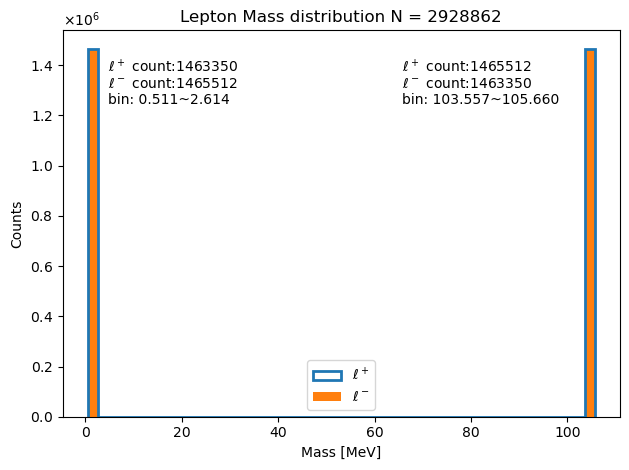

In [65]:
fig = plt.plot(figsize=(6,6))
plt.hist(LeptonP['m']/GeV, histtype='step',bins=50, label=r'$\ell^+$',lw=2)
plt.hist(LeptonM['m']/GeV,bins=50, label=r'$\ell^-$')
lp, bp = np.histogram(LeptonP['m']/GeV,bins=50)
lm, bm = np.histogram(LeptonM['m']/GeV,bins=50)
plt.xlabel('Mass [MeV]')
plt.ylabel('Counts')
plt.title('Lepton Mass distribution N = {}'.format(len(LeptonP['m'])))
print(lp[0],lp[-1],bp[0]/GeV,bp[-1]/GeV)
print(lm[0],lm[-1],bm[0]/GeV,bm[-1]/GeV)
plt.text(bp[2],0.85*lp[0],r"$\ell^+$ count:{}".format(lp[0])+'\n'+r"$\ell^-$ count:{}".format(lm[0])+'\nbin: {:.3f}~{:.3f}'.format(bp[0],bp[1]))
plt.text(bp[-20],0.85*lp[0],r"$\ell^+$ count:{}".format(lp[-1])+'\n'+r"$\ell^-$ count:{}".format(lm[-1])+'\nbin: {:.3f}~{:.3f}'.format(bp[-2],bp[-1]))
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.legend()
plt.tight_layout()

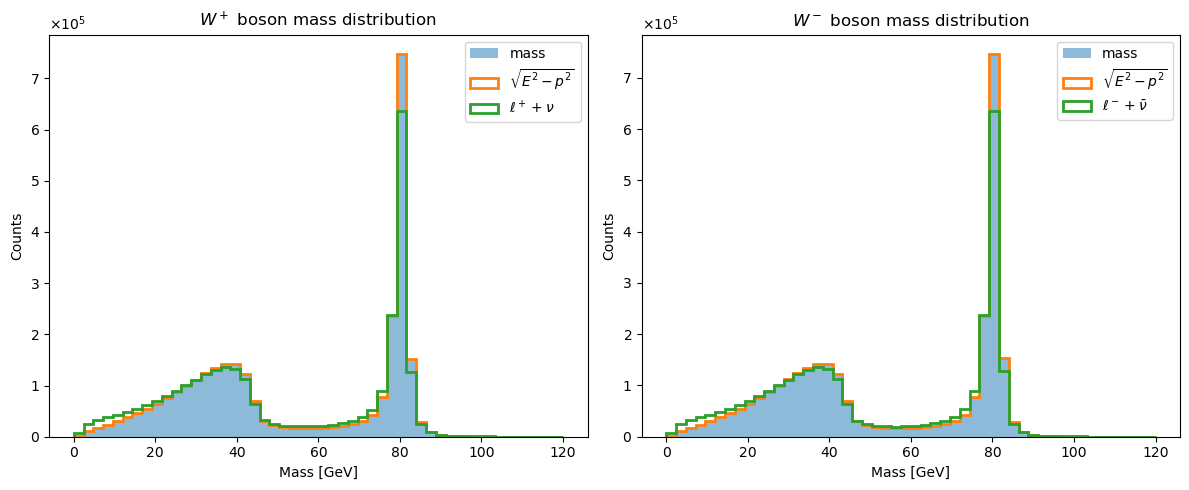

In [66]:
WPmass = np.sqrt(WBosonP['E']**2 - WBosonP['px']**2 - WBosonP['py']**2 - WBosonP['pz']**2)
WMmass = np.sqrt(WBosonM['E']**2 - WBosonM['px']**2 - WBosonM['py']**2 - WBosonM['pz']**2) 
PpairMass = np.sqrt((LeptonP[  'E']+NeutrinoP[ 'E'])**2
                   -(LeptonP[ 'px']+NeutrinoP['px'])**2
                   -(LeptonP[ 'py']+NeutrinoP['py'])**2
                   -(LeptonP[ 'pz']+NeutrinoP['pz'])**2)
MpairMass = np.sqrt((LeptonM[  'E']+NeutrinoM[ 'E'])**2
                   -(LeptonM[ 'px']+NeutrinoM['px'])**2
                   -(LeptonM[ 'py']+NeutrinoM['py'])**2
                   -(LeptonM[ 'pz']+NeutrinoM['pz'])**2)

fig, ax = plt.subplots(nrows = 1, ncols =2 ,figsize=(12,5))
xrange = [0,120]
ax[0].hist(WBosonP['m'],bins=50, alpha=0.5,label='mass',range=xrange)
ax[0].hist(WPmass, histtype='step',bins=50,label=r'$\sqrt{E^2 - p^2}$',lw=2,range=xrange)
ax[0].hist(PpairMass[evtP], histtype='step',bins=50,label=r'$\ell^+ + \nu$',lw=2,range=xrange)
ax[0].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
ax[0].set_title("$W^+$ boson mass distribution")
ax[0].set_xlabel("Mass [GeV]")
ax[0].set_ylabel("Counts")
ax[0].legend()

ax[1].hist(WBosonM['m'],bins=50, alpha=0.5,label='mass',range=xrange)
ax[1].hist(WMmass, histtype='step',bins=50,label=r'$\sqrt{E^2 - p^2}$',lw=2,range=xrange)
ax[1].hist(MpairMass[evtM], histtype='step',bins=50,label=r'$\ell^- + \bar{\nu}$',lw=2,range=xrange)
ax[1].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
ax[1].set_title("$W^-$ boson mass distribution")
ax[1].set_xlabel("Mass [GeV]")
ax[1].set_ylabel("Counts")
ax[1].legend()
plt.tight_layout()

## Filtering non-timelike vectors

In [49]:
A = np.where(vec_mag(LeptonP['px']/LeptonP['E'], LeptonP['py']/LeptonP['E'], LeptonP['pz']/LeptonP['E']) >= 1, 1, 0)# Check cases where E**2 - p**2 < 0
B = np.where(vec_mag(LeptonM['px']/LeptonM['E'], LeptonM['py']/LeptonM['E'], LeptonM['pz']/LeptonM['E']) >= 1, -1, 0)# Check cases where E**2 - p**2 < 0
evt = []
rmv_evt = []
for i, j in enumerate(A):
    if j == 0:
        evt.append(i)
    else: rmv_evt.append(i)
print('\nTotal lepton +: ',len(B),\
      '\nTimelike lepton +: ',len(evt),\
      '\nNon-Timelike lepton +:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))
'''

evt = []
rmv_evt = []
for i, j in enumerate(B):
    if j == 0:
        evt.append(i)
    else: rmv_evt.append(i)
print('\nTotal lepton -: ',len(B),\
      '\nTimelike lepton -: ',len(evt),\
      '\nNon-Timelike lepton -:',len(rmv_evt),\
      '\nSum: ',len(evt)+len(rmv_evt))
'''


Total lepton +:  2928862 
Timelike lepton +:  2187848 
Non-Timelike lepton +: 741014 
Sum:  2928862


"\n\nevt = []\nrmv_evt = []\nfor i, j in enumerate(B):\n    if j == 0:\n        evt.append(i)\n    else: rmv_evt.append(i)\nprint('\nTotal lepton -: ',len(B),      '\nTimelike lepton -: ',len(evt),      '\nNon-Timelike lepton -:',len(rmv_evt),      '\nSum: ',len(evt)+len(rmv_evt))\n"

In [55]:
a = np.random.choice(rmv_evt)
print(LeptonP['m'][a])
print(np.unique(LeptonP['m'],return_counts=True))
print(len(WBosonP['m'][rmv_evt][LeptonP['m']<0.1]))
print(len(WBosonP['m'][rmv_evt][LeptonP['m']>0.1]))

0.0005110000000000001
(array([0.000511, 0.10566 ]), array([1463350, 1465512]))
729156
11858


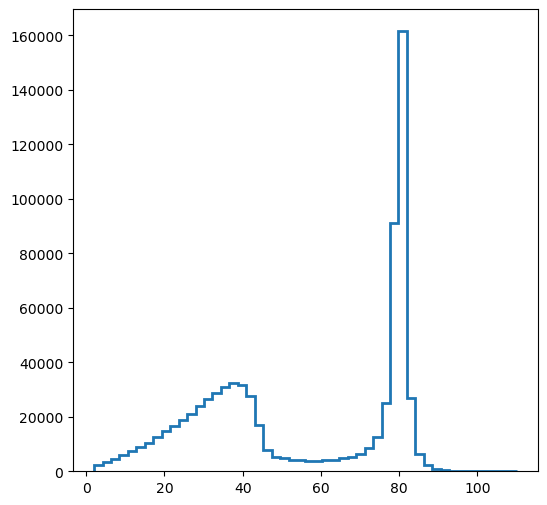

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.hist(WBosonP['m'][rmv_evt][LeptonP['m'] < 0.5],bins=50,histtype='step',lw=2)
plt.show()

In [81]:
C = A-B # C = 0,1,2 : the amount of non-timelike leptons
'''
A-B | 0 | 1 -----A
-------------
 0  | 0 | 1
-------------
-1  |-1 | 2
 -
 -
 B
'''
D = np.where(A+B == 1, True,False) # select events with one non-timelike lepton+
E = np.where(A+B ==-1, True,False) # select events with one non-timelike lepton-
#A = np.where(vec_mag(LeptonP['px']/LeptonP['E'], LeptonP['py']/LeptonP['E'], LeptonP['pz']/LeptonP['E']) >= 1, True, False) # select non-timelike lepton+
#B = np.where(vec_mag(LeptonM['px']/LeptonM['E'], LeptonM['py']/LeptonM['E'], LeptonM['pz']/LeptonM['E']) >= 1, True, False) # select non-timelike lepton-

p,q = np.unique(D, return_counts=True)
print(p,q)
p,q = np.unique(E, return_counts=True)
print(p,q)
r = np.where(LeptonP['m'][D]*MeV < 50,True,False)
s,t = np.unique(r, return_counts=True)
x = np.where(LeptonM['m'][E]*MeV < 50,True,False)
y,z = np.unique(x, return_counts=True)
print(s,t)
print(y,z)

[False  True] [2199738  729124]
[False  True] [2198731  730131]
[False  True] [  5891 723233]
[False  True] [  5971 724160]


[1457717 1459255   11890] [0 1 2 3]


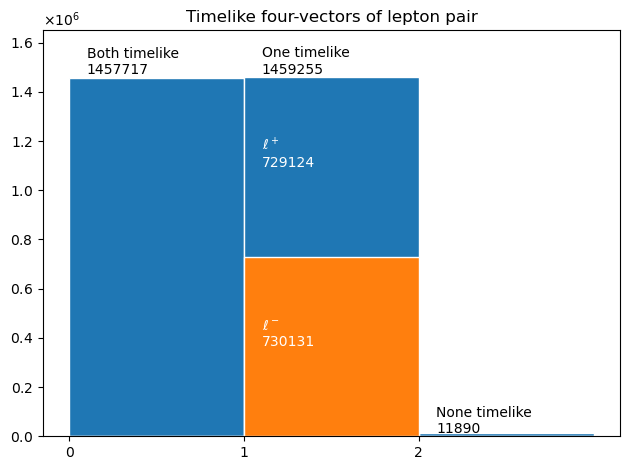

In [99]:
MeV = 1000
plt.plot(figsize=(6,6))
plt.hist(C,bins=[0,1,2,3],edgecolor='White')
plt.hist(np.full(q[1],1),bins=[0,1,2,3],edgecolor='white')
vc, vb = np.histogram(C,bins=[0,1,2,3])
print(vc,vb)
plt.text(vb[0]+0.1,vc[0]*1.01,'Both timelike\n{}'.format(vc[0]))
plt.text(vb[1]+0.1,vc[1]*1.01,'One timelike\n{}'.format(vc[1]))
plt.text(vb[1]+0.1,0.5*(vc[1]+q[1]),r'$\ell^+$'+'\n{}'.format(vc[1]-q[1]),c='White')
plt.text(vb[1]+0.1,0.5*q[1],r'$\ell^-$'+'\n{}'.format(q[1]),c='White')
plt.text(vb[2]+0.1,vc[2]*1.01,'None timelike\n{}'.format(vc[2]))
plt.ylim([0,1.65E6])
plt.title("Timelike four-vectors of lepton pair")
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.xticks([0,1,2])
plt.tight_layout()

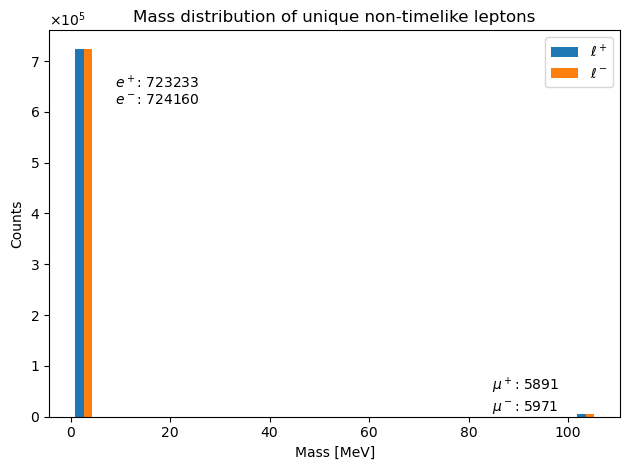

In [100]:
MeV = 1000
plt.plot(figsize=(6,6))
pc,bp = np.histogram(LeptonP['m'][D]*MeV,bins=25)
mc,bm = np.histogram(LeptonM['m'][E]*MeV,bins=25)
plt.hist([LeptonP['m'][D]*MeV,LeptonM['m'][E]*MeV], bins=25, label=[r'$\ell^+$',r'$\ell^-$'])
plt.text(bp[2],0.85*pc[0],r'$e^+$: {}'.format(pc[0])+'\n'+r'$e^-$: {}'.format(mc[0]))
plt.text(bp[-6],2*pc[-1],r'$\mu^+$: {}'.format(pc[-1])+'\n'+r'$\mu^-$: {}'.format(mc[-1]))
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.xlabel('Mass [MeV]')
plt.ylabel("Counts")
plt.title("Mass distribution of unique non-timelike leptons")
plt.legend()
plt.tight_layout()
plt.show()

In [94]:
A = np.where(vec_mag(LeptonP['px']/LeptonP['E'], LeptonP['py']/LeptonP['E'], LeptonP['pz']/LeptonP['E']) >= 1, False, True) # exclude non-timelike lepton+
B = np.where(vec_mag(LeptonM['px']/LeptonM['E'], LeptonM['py']/LeptonM['E'], LeptonM['pz']/LeptonM['E']) >= 1, False, True) # exclude non-timelike lepton-
idx = A&B

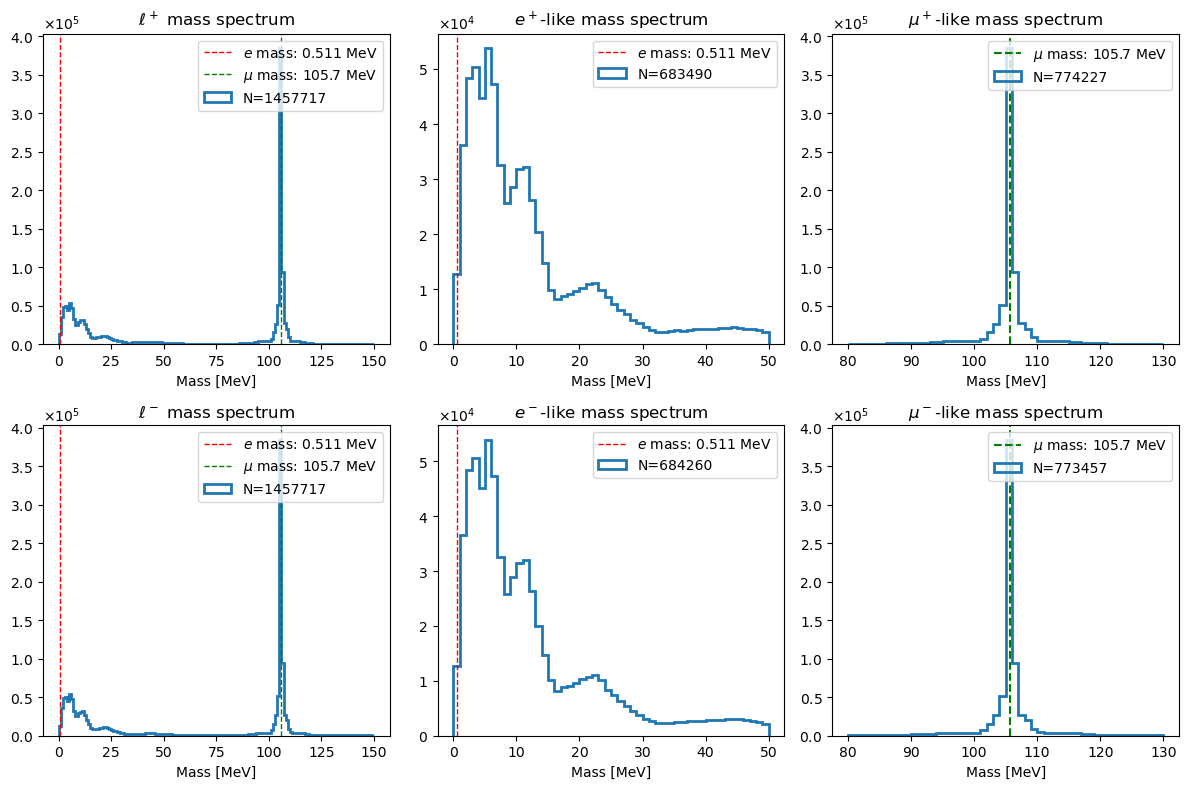

In [95]:
#plt.title(f'Mass: {"%.4f"%a},{"%.4f"%b} MeV')
#plt.hist(LeptonP['m']*1000,bins=50)
P_mass = np.sqrt(LeptonP['E'][idx]**2 - LeptonP['px'][idx]**2 - LeptonP['py'][idx]**2 - LeptonP['pz'][idx]**2)/GeV # using MeV as unit
M_mass = np.sqrt(LeptonM['E'][idx]**2 - LeptonM['px'][idx]**2 - LeptonM['py'][idx]**2 - LeptonM['pz'][idx]**2)/GeV # using MeV as unit
#H_mass = np.sqrt((Higgs['E']**2 - Higgs['px']**2 - Higgs['py']**2 - Higgs['pz']**2)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize = (12,8))
ax[0,0].hist(P_mass ,range = [0,150],histtype='step',label = 'N={}'.format(len(P_mass)), bins=150,lw=2)
ax[1,0].hist(M_mass ,range = [0,150],histtype='step',label = 'N={}'.format(len(M_mass)), bins=150,lw=2)

ax[0,1].hist(P_mass[P_mass < 50] ,range = [0,50],histtype='step', label = 'N={}'.format(len(P_mass[P_mass < 50])),bins=50,lw=2)
ax[1,1].hist(M_mass[M_mass < 50] ,range = [0,50],histtype='step', label = 'N={}'.format(len(M_mass[M_mass < 50])), bins=50,lw=2)

ax[0,2].hist(P_mass[P_mass > 50] ,range = [80,130],histtype='step', label = 'N={}'.format(len(P_mass[P_mass > 50])), bins=50,lw=2)
ax[1,2].hist(M_mass[M_mass > 50] ,range = [80,130],histtype='step', label = 'N={}'.format(len(M_mass[M_mass > 50])), bins=50,lw=2)

a1 = np.mean(P_mass[P_mass < 50])
b1 = np.mean(P_mass[P_mass > 50])
a2 = np.mean(M_mass[M_mass < 50])
b2 = np.mean(M_mass[M_mass > 50])

ax[0,0].set_title(r'$\ell^+$ mass spectrum')
ax[1,0].set_title(r'$\ell^-$ mass spectrum')
ax[0,1].set_title(r'$e^+$-like mass spectrum')
ax[1,1].set_title(r'$e^-$-like mass spectrum')
ax[0,2].set_title(r'$\mu^+$-like mass spectrum')
ax[1,2].set_title(r'$\mu^-$-like mass spectrum')
#plt.axvline(a,label = r'$e$ mass: {:.4f} MeV'.format(a),ls='--',c='r',lw=2)
#plt.axvline(b,label=r'$\mu$ mass: {:.4f} MeV'.format(b),ls='--',c='g',lw=2)

for i in range(2):
    for j in range(3):
        if j == 0:
            ax[i,j].axvline(0.511,label = r'$e$ mass: 0.511 MeV',ls='--',c='r',lw=1)
            ax[i,j].axvline(105.7,label=r'$\mu$ mass: 105.7 MeV',ls='--',c='g',lw=1)
        if j == 1:
            ax[i,j].axvline(0.511,label = r'$e$ mass: 0.511 MeV',ls='--',c='r',lw=1)

        if j == 2:
            ax[i,j].axvline(105.7,label=r'$\mu$ mass: 105.7 MeV',ls='--',c='g')
        ax[i,j].legend()
        ax[i,j].set_xlabel('Mass [MeV]')
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.tight_layout()

# Boost Function

In [33]:
BoostToRest(Higgs  , 'H', None, Higgs  , 'H', None) # Boost to self
BoostToRest(WBosonP, 'Wp', None, Higgs, 'H', None) # Boost W to Higgs rest frame
BoostToRest(WBosonM, 'Wm', None, Higgs, 'H', None)
BoostToRest(LeptonP,'lp', None, Higgs  , 'H', None) #Boost leptons to Higgs rest frame
BoostToRest(LeptonM,'lm', None, Higgs  , 'H', None)

In [34]:
BoostToRest(LeptonP,'lp', None, WBosonP, 'W', None)
BoostToRest(LeptonM,'lm', None, WBosonM, 'W', None)

In [35]:
BoostToRest(NeutrinoP, 'np', None, WBosonP, 'W', None)
BoostToRest(NeutrinoM, 'nm', None, WBosonM, 'W', None)

In [36]:
#from Higgs rest frame, boost again to the rest frame of W (also in Higgs rest frame)
BoostToRest(LeptonP,'lpH', ['E_H','px_H','py_H','pz_H'], WBosonP, 'WH', ['E_H','px_H','py_H','pz_H'])
BoostToRest(LeptonM,'lmH', ['E_H','px_H','py_H','pz_H'], WBosonM, 'WH', ['E_H','px_H','py_H','pz_H'])

In [37]:
BoostToRest(WBosonP, 'W', None, WBosonP, 'W', None)
BoostToRest(WBosonM, 'W', None, WBosonM, 'W', None)

In [41]:
WBosonP.columns

Index(['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'px_H', 'py_H', 'pz_H',
       'E_H', 'v2', 'gamma', 'gamma2', 'vp_lp', 'vp_np', 'vp_lpH', 'vp_W',
       'px_W', 'py_W', 'pz_W', 'E_W'],
      dtype='object')

In [65]:
lepton1 = four_momentum(LeptonP,None, a)
WBoson1 = four_momentum(WBosonP,None, a)
higgs   = four_momentum(Higgs  ,None, a)
print('Event:',a)
# In lab frame
## lepton
print('Lepton+ four-momentum:')
lepton1.components()
## W Boson
print('W+ Boson four-momentum:')
WBoson1.components()
print('\tInvariant W+ Mass:',np.sqrt(WBoson1.M2()))
print('\tRecorded W+ Mass:', WBosonP['m'][a])
## Higgs
print('Higgs four-momentum:')
higgs.components()
print('\tInvariant Higgs Mass:',np.sqrt(higgs.M2()))
print('\tRecorded Higgs Mass:', Higgs['m'][a])
## The three-vector used to Boost
print('Higgs Boost Vector:')
(higgs.BoostVector()).components()

# In Higgs rest frame
## Verify by boosting Higgs to itself
higgs_H = higgs.Boost(-1*higgs.BoostVector())
print('Higgs in Higgs rest frame')
## Verify Lorentz Invariance
higgs_H.components()
print('\tInvariant Higgs Mass:',np.sqrt(higgs_H.M2()))
print('W+ Boson in Higgs rest frame')
(WBoson1_H.BoostVector()).components()
## Boosted Beam axis
print("Beam axis in Higgs rest frame")
beam = LorentzVector(0,0,0,1)
beam = beam.Boost(-1*higgs.BoostVector())
beam.components()
## Boosted W Boson
WBoson1_H = WBoson1.Boost(-1*higgs.BoostVector())
WBoson1_H.components()
print('\tInvariant Mass:',np.sqrt(WBoson1_H.M2()))
## Boosted lepton
## The three-vector used to Boost
print('Higgs rest frame W Boost Vector:')
(WBoson1_H.BoostVector()).components()
lepton1_H = lepton1.Boost(-1*higgs.BoostVector())
lepton1_H.components()
print("Boost Higgs rest frame lepton to Higgs rest frame W boson")
lepton1_H_W = lepton1_H.Boost(-1*WBoson1_H.BoostVector())
lepton1_H_W.components()
print("Boost lab frame lepton to Higgs rest frame W boson")
lepton1_WH = lepton1.Boost(-1*WBoson1_H.BoostVector())
lepton1_WH.components()
print("Boost lab frame lepton to lab frame W boson")
lepton1_W = lepton1.Boost(-1*WBoson1.BoostVector())
lepton1_W.components()

Event: 2271983
Lepton+ four-momentum:
-2.036531738 4.625440918000001 -7.446236328 8.999366211
W+ Boson four-momentum:
44.314050781 46.627136719000006 -154.5704375 168.86821875
	Invariant W+ Mass: 22.05969581891563
	Recorded W+ Mass: 22.0596875
Higgs four-momentum:
90.149132812 54.004339844 -293.51671875 335.88759375
	Invariant Higgs Mass: 125.00030632225096
	Recorded Higgs Mass: 125.000328125
Higgs Boost Vector:
0.26839077860999444 0.1607809899766505 -0.8738540041715964
Higgs in Higgs rest frame
0.0 -2.842170943040401e-14 -1.1368683772161603e-13 125.000306322251
	Invariant Higgs Mass: 125.000306322251
W+ Boson in Higgs rest frame
0.09589063686154863 0.5761841146732215 -0.5779862662424204
Beam axis in Higgs rest frame
-0.7211912951604723 -0.4320336600198139 2.3481279957291727 2.687094165066133
3.711948938854917 22.304221590835553 -22.373983298796702 38.71023345286988
	Invariant Mass: 22.059695818915802
Higgs rest frame W Boost Vector:
0.09589063686154863 0.5761841146732215 -0.5779862662

In [75]:
%%time
xi_p = np.zeros((len(WBosonP['px_H']),3))
xi_m = np.zeros((len(WBosonM['px_H']),3))
#W Boson in Higgs rest frame 
beam = LorentzVector(0,0,1,1)

for i in range(len(WBosonP['E'])):
    higgs_p3 = four_momentum(Higgs,None,i).BoostVector()
    lp_lab = four_momentum(LeptonP,None,i)
    lm_lab = four_momentum(LeptonM,None,i)
    wp_lab = four_momentum(WBosonP, None, i)
    wm_lab = four_momentum(WBosonM, None, i)
    # boosting to Higgs rest frame
    lp_H = lp_lab.Boost(-1*higgs_p3)
    lm_H = lm_lab.Boost(-1*higgs_p3)
    wp_H = wp_lab.Boost(-1*higgs_p3)
    wm_H = wm_lab.Boost(-1*higgs_p3)
    # From the higgs rest frame, boost leptons to W boson rest frame
    lp_WH = lp_H.Boost(-1*wp_H.BoostVector())
    lm_WH = lm_H.Boost(-1*wm_H.BoostVector())
    # coordinate definition
    p_vect_H = beam.Boost(-1*higgs_p3)
    p_vect = p_vect_H.P3().unit()
    k_vect = wp_H.P3().unit()
    y = p_vect.dot(k_vect)
    R = np.sqrt(1 - y**2)
    r_vect = (p_vect - y*k_vect).unit()
    n_vect = (p_vect.cross(k_vect)).unit()
    # calculate directional cosines
    xi_p[i,0] = n_vect.cos(lp_WH.P3())
    xi_p[i,1] = r_vect.cos(lp_WH.P3())
    xi_p[i,2] = k_vect.cos(lp_WH.P3())
    xi_m[i,0] = n_vect.cos(lm_WH.P3())
    xi_m[i,1] = r_vect.cos(lm_WH.P3())
    xi_m[i,2] = k_vect.cos(lm_WH.P3())
    if (i%100000==0): print(i,' events processed')

0  events processed
100000  events processed
200000  events processed
300000  events processed
400000  events processed
500000  events processed
600000  events processed
700000  events processed
800000  events processed
900000  events processed
1000000  events processed
1100000  events processed
1200000  events processed
1300000  events processed
1400000  events processed
1500000  events processed
1600000  events processed
1700000  events processed
1800000  events processed
1900000  events processed
2000000  events processed
2100000  events processed
2200000  events processed
2300000  events processed
2400000  events processed
2500000  events processed
2600000  events processed
2700000  events processed
2800000  events processed
2900000  events processed
CPU times: user 6min 26s, sys: 0 ns, total: 6min 26s
Wall time: 6min 26s


In [33]:
LeptonP

,E,px,py,pz,m,pt,eta,phi,px_H,py_H,pz_H,E_H,px_H_WH,py_H_WH,pz_H_WH,E_H_WH,px_W,py_W,pz_W,E_W
0,19.465703,-5.065763,16.360542,-9.250574,0.105660,17.126859,-0.516806,1.871067,-8.083774,3.610886,-18.860012,20.834998,-0.433998,3.650204,-19.442455,19.787182,-1.802372,3.597670,-19.373425,19.787182
1,131.817141,8.901175,2.966260,131.482766,0.105660,9.382410,3.334457,0.321670,-13.021360,5.893808,7.001304,15.916103,-16.517609,11.943492,3.400025,20.665185,-17.111192,11.483680,-1.539722,20.665185
2,94.193734,-3.040100,49.431305,80.123430,0.000511,49.524702,1.258405,1.632220,-3.236419,50.178620,11.849799,51.660291,3.812260,19.194541,11.113239,22.504829,5.068809,13.681512,17.134503,22.504829
3,165.226891,4.702402,-19.638676,163.988219,0.000511,20.193815,2.791335,-1.335775,13.435660,-10.033665,44.391924,47.453489,6.246598,-2.687010,39.070684,39.658009,2.514776,0.646772,39.572919,39.658009
4,6.403636,5.808921,-2.135702,-1.643704,0.000511,6.189086,-0.262554,-0.352319,6.046782,-2.222712,-10.222132,12.082880,10.566402,2.944777,-14.158481,17.910420,8.660076,0.629394,-15.664932,17.910420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928857,22.480516,-4.717555,-16.589703,14.418352,0.105660,17.247422,0.760511,-1.847849,-2.811388,-17.077129,10.700889,20.348278,5.190135,-6.913897,12.759040,15.412454,5.549074,-6.463052,12.844038,15.412454
2928858,99.478336,-39.512535,-10.980121,90.631805,0.105660,41.009798,1.533792,-2.870542,-31.161370,-3.738063,-24.358233,39.728320,-34.528572,9.773525,-17.729478,40.026120,-33.070690,4.538368,-22.086446,40.026120
2928859,146.673859,-4.429424,-31.802176,143.116078,0.105660,32.109160,2.200015,-1.709187,3.796961,-28.369571,-4.753115,29.014696,-6.664153,-5.334301,2.348851,8.854029,-8.278792,-1.660344,2.662266,8.854029
2928860,93.748234,50.839535,-12.679508,77.738687,0.000511,52.396834,1.185661,-0.244416,41.459006,-19.247775,-5.713364,46.064826,38.057841,-11.358979,7.503941,40.419481,37.539574,-9.709357,11.412430,40.419481


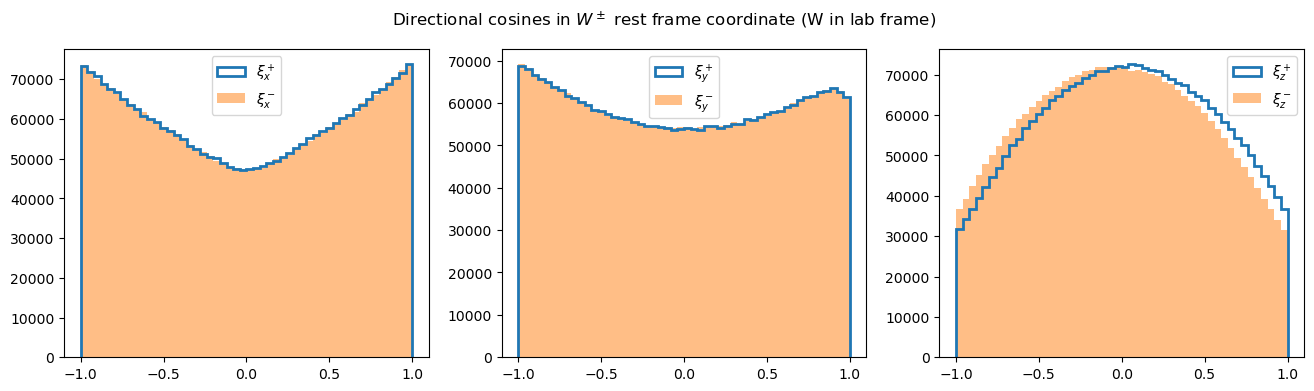

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize = (16,4))
fig_label= [[r'$\xi^+_x$',r'$\xi^+_y$',r'$\xi^+_z$'],\
            [r'$\xi^-_x$',r'$\xi^-_y$',r'$\xi^-_z$']]
plt.suptitle(r"Directional cosines in $W^\pm$ rest frame coordinate (W in lab frame)")
#plt.suptitle(r"Directional cosines in $W^\pm$ rest frame coordinate")

for i in range(3):
    ax[i].hist(xi_p[:,i],bins=50,histtype='step',lw=2,label = fig_label[0][i])
    ax[i].hist(xi_m[:,i],bins=50,histtype='bar',alpha=0.5,label = fig_label[1][i])
    ax[i].legend()

In [73]:
def CGLMP_Bij(pi,pj,mi,mj):
    O1 = (pi*mi + pj*mj)*(8/np.sqrt(3))
    O2 =((pi**2 - pj**2)*(mi**2 - mj**2))*25 
    O3 = (pi*pj*mi*mj)*100 
    return O1 + O2 + O3
B_xy = CGLMP_Bij(xi_p[:,0],xi_p[:,1],xi_m[:,0],xi_m[:,1])
B_yz = CGLMP_Bij(xi_p[:,1],xi_p[:,2],xi_m[:,1],xi_m[:,2])
B_zx = CGLMP_Bij(xi_p[:,2],xi_p[:,0],xi_m[:,2],xi_m[:,0])

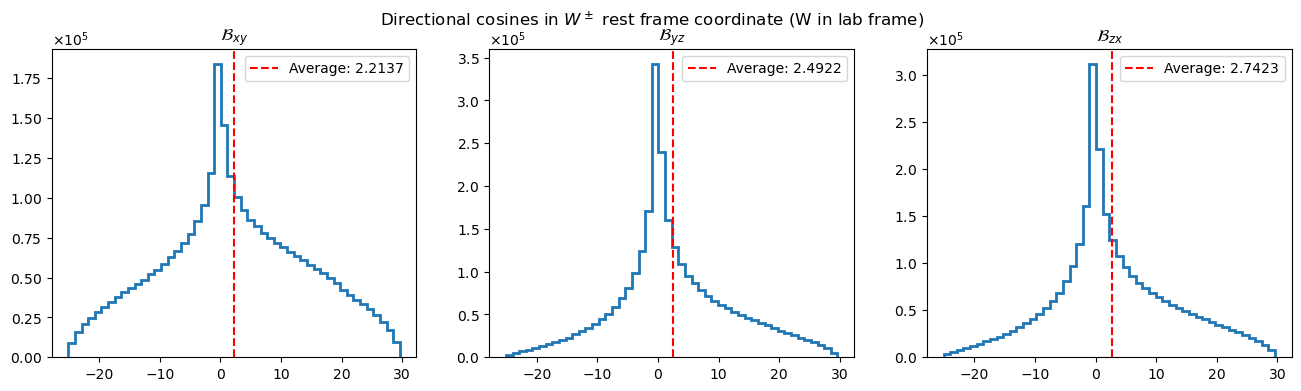

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize = (16,4))
fig_title= [r'$\mathcal{B}_{xy}$',r'$\mathcal{B}_{yz}$',r'$\mathcal{B}_{zx}$']
plt.suptitle(r"Directional cosines in $W^\pm$ rest frame coordinate (W in lab frame)")
#plt.suptitle(r"Directional cosines in $W^\pm$ rest frame coordinate")

ax[0].hist(B_xy,bins=50,histtype='step',lw=2)
ax[1].hist(B_yz,bins=50,histtype='step',lw=2)
ax[2].hist(B_zx,bins=50,histtype='step',lw=2)
B_avg = [np.mean(B_xy),np.mean(B_yz),np.mean(B_zx)]
for i in range(3):
    ax[i].set_title(fig_title[i])
    ax[i].axvline(B_avg[i],ls='dashed',c='r',label='Average: {:.4f}'.format(B_avg[i]))
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i].legend()

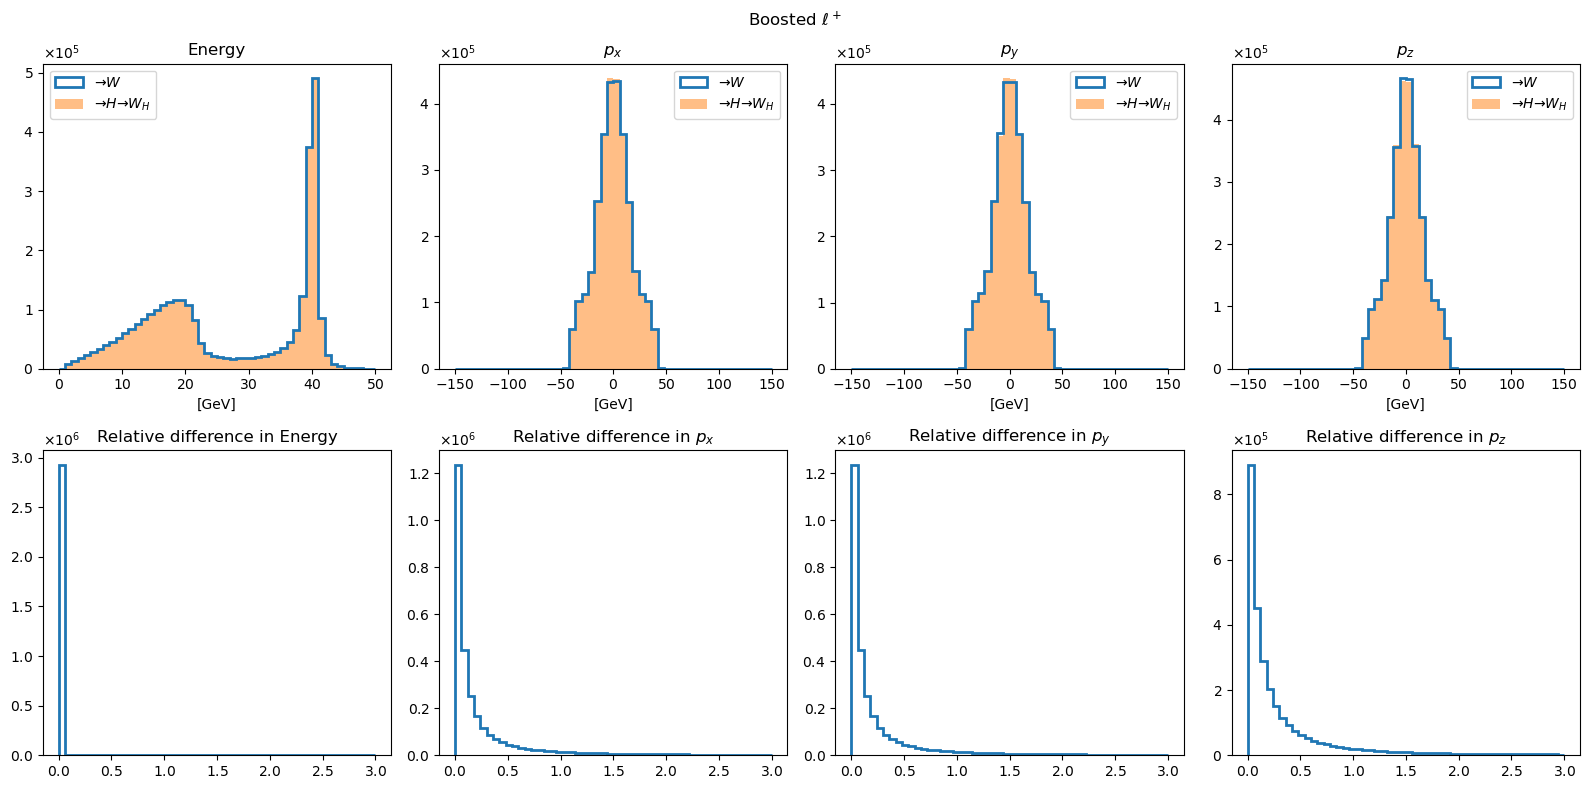

In [114]:
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8),tight_layout=True)
plt.suptitle("Boosted $\ell^+$")
ax[0,0].set_title(r'Energy')
ax[0,0].hist(LeptonP[ 'E_W'],histtype='step',bins=50,range=[0,50],label=r'$\to W$',lw=2)
ax[0,0].hist(LeptonP[ 'E_H_WH'],histtype='bar' ,bins=50,range=[0,50],label=r'$\to H \to W_H$',alpha=0.5)

ax[0,1].set_title(r'$p_x$')
ax[0,1].hist(LeptonP['px_W'],histtype='step',bins=50,range=[-150,150],label=r'$\to W$',lw=2)
ax[0,1].hist(LeptonP['px_H_WH'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\to H \to W_H$',alpha=0.5)

ax[0,2].set_title(r'$p_y$')
ax[0,2].hist(LeptonP['py_W'],histtype='step',bins=50,range=[-150,150],label=r'$\to W$',lw=2)
ax[0,2].hist(LeptonP['py_H_WH'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\to H \to W_H$',alpha=0.5)

ax[0,3].set_title(r'$p_z$')
ax[0,3].hist(LeptonP['pz_W'],histtype='step',bins=50,range=[-150,150],label=r'$\to W$',lw=2)
ax[0,3].hist(LeptonP['pz_H_WH'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\to H \to W_H$',alpha=0.5)

ax[1,0].set_title(r'Relative difference in Energy')
ax[1,0].hist(np.abs(1 - LeptonP[ 'E_W']/LeptonP[ 'E_H_WH']),histtype='step',bins=50,range=[0,3],lw=2)
ax[1,1].set_title(r'Relative difference in $p_x$')
ax[1,1].hist(np.abs(1 - LeptonP['px_W']/LeptonP['px_H_WH']),histtype='step',bins=50,range=[0,3],lw=2)
ax[1,2].set_title(r'Relative difference in $p_y$')
ax[1,2].hist(np.abs(1 - LeptonP['py_W']/LeptonP['py_H_WH']),histtype='step',bins=50,range=[0,3],lw=2)
ax[1,3].set_title(r'Relative difference in $p_z$')
ax[1,3].hist(np.abs(1 - LeptonP['pz_W']/LeptonP['pz_H_WH']),histtype='step',bins=50,range=[0,3],lw=2)
for i in range(2):
    for j in range(4):
        if i==0: ax[i,j].set_xlabel('[GeV]')
        ax[i,j].ticklabel_format(axis='X', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        if i==0: ax[i,j].legend()
plt.show()

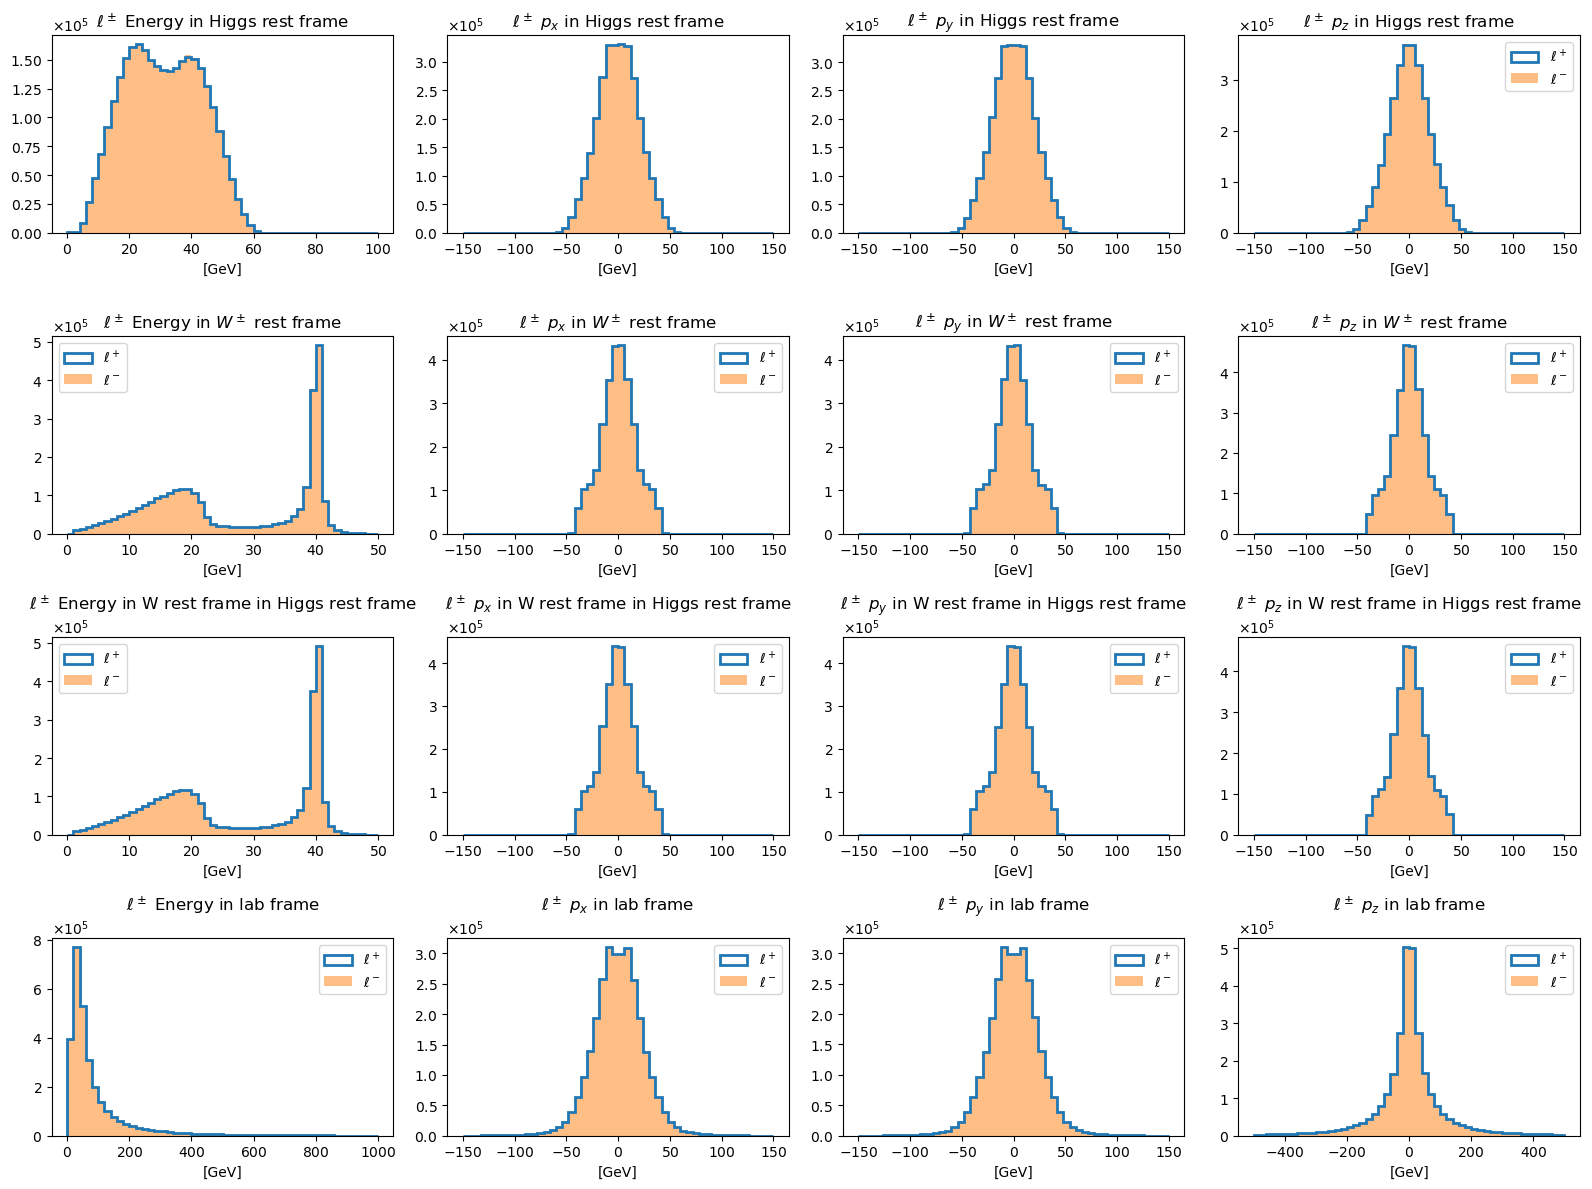

In [32]:
fig, ax = plt.subplots(nrows=4, ncols =4, figsize=(16,12))
ax[0,0].set_title(r'$\ell^\pm$ Energy in Higgs rest frame')
ax[0,0].hist(LeptonP[ 'E_H'],histtype='step',bins=50,range=[0,100],label=r'$\ell^+$',lw=2)
ax[0,0].hist(LeptonM[ 'E_H'],histtype='bar' ,bins=50,range=[0,100],label=r'$\ell^-$',alpha=0.5)

ax[0,1].set_title(r'$\ell^\pm$ $p_x$ in Higgs rest frame')
ax[0,1].hist(LeptonP['px_H'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[0,1].hist(LeptonM['px_H'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[0,2].set_title(r'$\ell^\pm$ $p_y$ in Higgs rest frame')
ax[0,2].hist(LeptonP['py_H'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[0,2].hist(LeptonM['py_H'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[0,3].set_title(r'$\ell^\pm$ $p_z$ in Higgs rest frame')
ax[0,3].hist(LeptonP['pz_H'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[0,3].hist(LeptonM['pz_H'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[1,0].set_title(r'$\ell^\pm$ Energy in $W^\pm$ rest frame')
ax[1,0].hist(LeptonP[ 'E_W'],histtype='step',bins=50,range = [0,50],label=r'$\ell^+$',lw=2)
ax[1,0].hist(LeptonM[ 'E_W'],histtype='bar' ,bins=50,range = [0,50],label=r'$\ell^-$',alpha=0.5)

ax[1,1].set_title(r'$\ell^\pm$ $p_x$ in $W^\pm$ rest frame')
ax[1,1].hist(LeptonP['px_W'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,1].hist(LeptonM['px_W'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[1,2].set_title(r'$\ell^\pm$ $p_y$ in $W^\pm$ rest frame')
ax[1,2].hist(LeptonP['py_W'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,2].hist(LeptonM['py_W'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[1,3].set_title(r'$\ell^\pm$ $p_z$ in $W^\pm$ rest frame')
ax[1,3].hist(LeptonP['pz_W'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,3].hist(LeptonM['pz_W'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[2,0].set_title(r'$\ell^\pm$ Energy in W rest frame in Higgs rest frame',pad=20)
ax[2,0].hist(LeptonP[ 'E_H_WH'],histtype='step',bins=50,range=[0,50],label=r'$\ell^+$',lw=2)
ax[2,0].hist(LeptonM[ 'E_H_WH'],histtype='bar' ,bins=50,range=[0,50],label=r'$\ell^-$',alpha=0.5)

ax[2,1].set_title(r'$\ell^\pm$ $p_x$ in W rest frame in Higgs rest frame',pad=20)
ax[2,1].hist(LeptonP['px_H_WH'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[2,1].hist(LeptonM['px_H_WH'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[2,2].set_title(r'$\ell^\pm$ $p_y$ in W rest frame in Higgs rest frame',pad=20)
ax[2,2].hist(LeptonP['py_H_WH'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[2,2].hist(LeptonM['py_H_WH'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[2,3].set_title(r'$\ell^\pm$ $p_z$ in W rest frame in Higgs rest frame',pad=20)
ax[2,3].hist(LeptonP['pz_H_WH'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[2,3].hist(LeptonM['pz_H_WH'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)


ax[3,0].set_title(r'$\ell^\pm$ Energy in lab frame',pad=20)
ax[3,0].hist(LeptonP[ 'E'],histtype='step',bins=50,range = [0,1000],label=r'$\ell^+$',lw=2)
ax[3,0].hist(LeptonM[ 'E'],histtype='bar' ,bins=50,range = [0,1000],label=r'$\ell^-$',alpha=0.5)

ax[3,1].set_title(r'$\ell^\pm$ $p_x$ in lab frame',pad=20)
ax[3,1].hist(LeptonP['px'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[3,1].hist(LeptonM['px'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[3,2].set_title(r'$\ell^\pm$ $p_y$ in lab frame',pad=20)
ax[3,2].hist(LeptonP['py'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[3,2].hist(LeptonM['py'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[3,3].set_title(r'$\ell^\pm$ $p_z$ in lab frame',pad=20)
ax[3,3].hist(LeptonP['pz'],histtype='step',bins=50,range=[-500,500],label=r'$\ell^+$',lw=2)
ax[3,3].hist(LeptonM['pz'],histtype='bar' ,bins=50,range=[-500,500],label=r'$\ell^-$',alpha=0.5)


for i in range(4):
    for j in range(4):
        ax[i,j].set_xlabel('[GeV]')
        ax[i,j].ticklabel_format(axis='X', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        if( i > 0 or j > 2 ): ax[i,j].legend()
plt.tight_layout()

## Boost to self (check code for Lorentz boost)

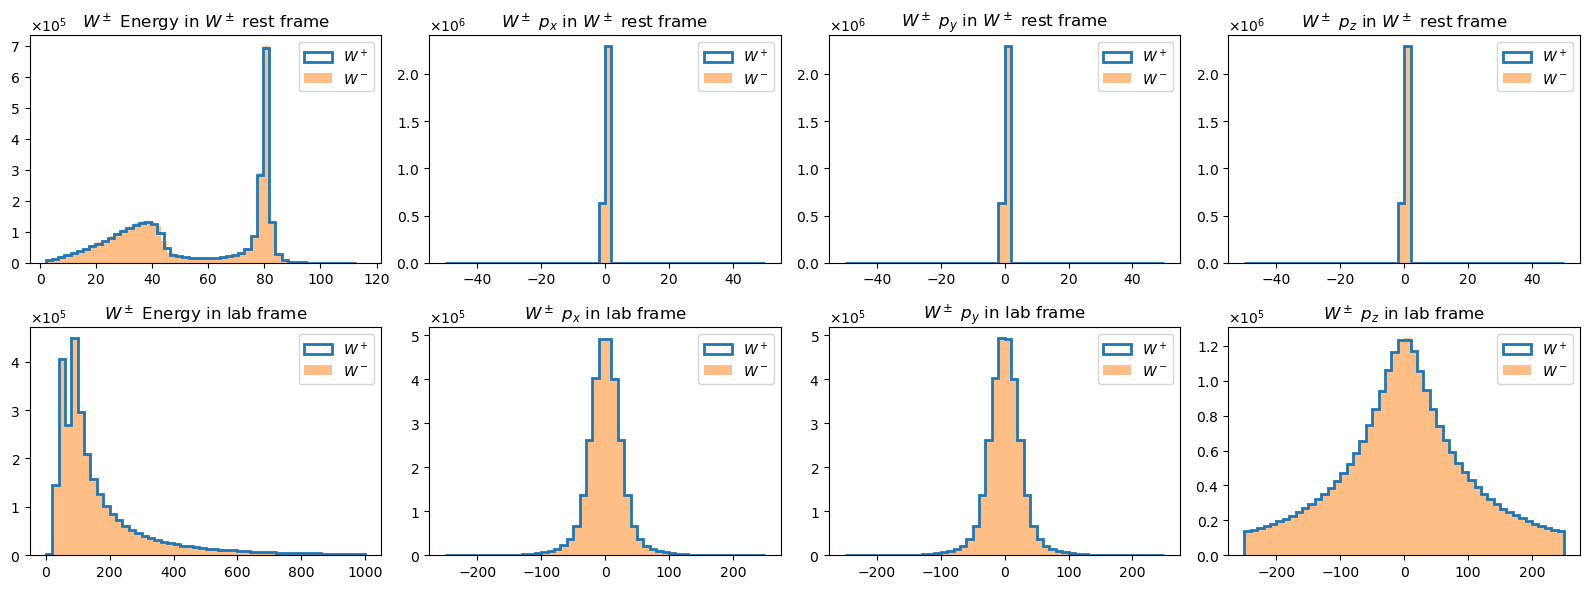

In [50]:
fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(16,6))
ax[0,0].set_title(r'$W^\pm$ Energy in $W^\pm$ rest frame')
ax[0,0].hist(WBosonP[ 'E_W'],histtype='step',bins=50,label=r'$W^+$',lw=2)
ax[0,0].hist(WBosonM[ 'E_W'],histtype='bar' ,bins=50,label=r'$W^-$',alpha=0.5)

ax[0,1].set_title(r'$W^\pm$ $p_x$ in $W^\pm$ rest frame')
ax[0,1].hist(WBosonP['px_W'],histtype='step',bins=50,range=[-50,50],label=r'$W^+$',lw=2)
ax[0,1].hist(WBosonM['px_W'],histtype='bar' ,bins=50,range=[-50,50],label=r'$W^-$', alpha=0.5)

ax[0,2].set_title(r'$W^\pm$ $p_y$ in $W^\pm$ rest frame')
ax[0,2].hist(WBosonP['py_W'],histtype='step',bins=50,range=[-50,50],label=r'$W^+$',lw=2)
ax[0,2].hist(WBosonM['py_W'],histtype='bar' ,bins=50,range=[-50,50],label=r'$W^-$',alpha=0.5)

ax[0,3].set_title(r'$W^\pm$ $p_z$ in $W^\pm$ rest frame')
ax[0,3].hist(WBosonP['pz_W'],histtype='step',bins=50,range=[-50,50],label=r'$W^+$',lw=2)
ax[0,3].hist(WBosonM['pz_W'],histtype='bar' ,bins=50,range=[-50,50],label=r'$W^-$',alpha=0.5)

ax[1,0].set_title(r'$W^\pm$ Energy in lab frame')
ax[1,0].hist(WBosonP[ 'E'],histtype='step',bins=50,range = [0,1000],label=r'$W^+$',lw=2)
ax[1,0].hist(WBosonM[ 'E'],histtype='bar' ,bins=50,range = [0,1000],label=r'$W^-$',alpha=0.5)

ax[1,1].set_title(r'$W^\pm$ $p_x$ in lab frame')
ax[1,1].hist(WBosonP['px'],histtype='step',bins=50,range=[-250,250],label=r'$W^+$',lw=2)
ax[1,1].hist(WBosonM['px'],histtype='bar' ,bins=50,range=[-250,250],label=r'$W^-$',alpha=0.5)

ax[1,2].set_title(r'$W^\pm$ $p_y$ in lab frame')
ax[1,2].hist(WBosonP['py'],histtype='step',bins=50,range=[-250,250],label=r'$W^+$',lw=2)
ax[1,2].hist(WBosonM['py'],histtype='bar' ,bins=50,range=[-250,250],label=r'$W^-$',alpha=0.5)

ax[1,3].set_title(r'$W^\pm$ $p_z$ in lab frame')
ax[1,3].hist(WBosonP['pz'],histtype='step',bins=50,range=[-250,250],label=r'$W^+$',lw=2)
ax[1,3].hist(WBosonM['pz'],histtype='bar' ,bins=50,range=[-250,250],label=r'$W^-$',alpha=0.5)

for i in range(2):
    for j in range (4):
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].legend()

plt.tight_layout()

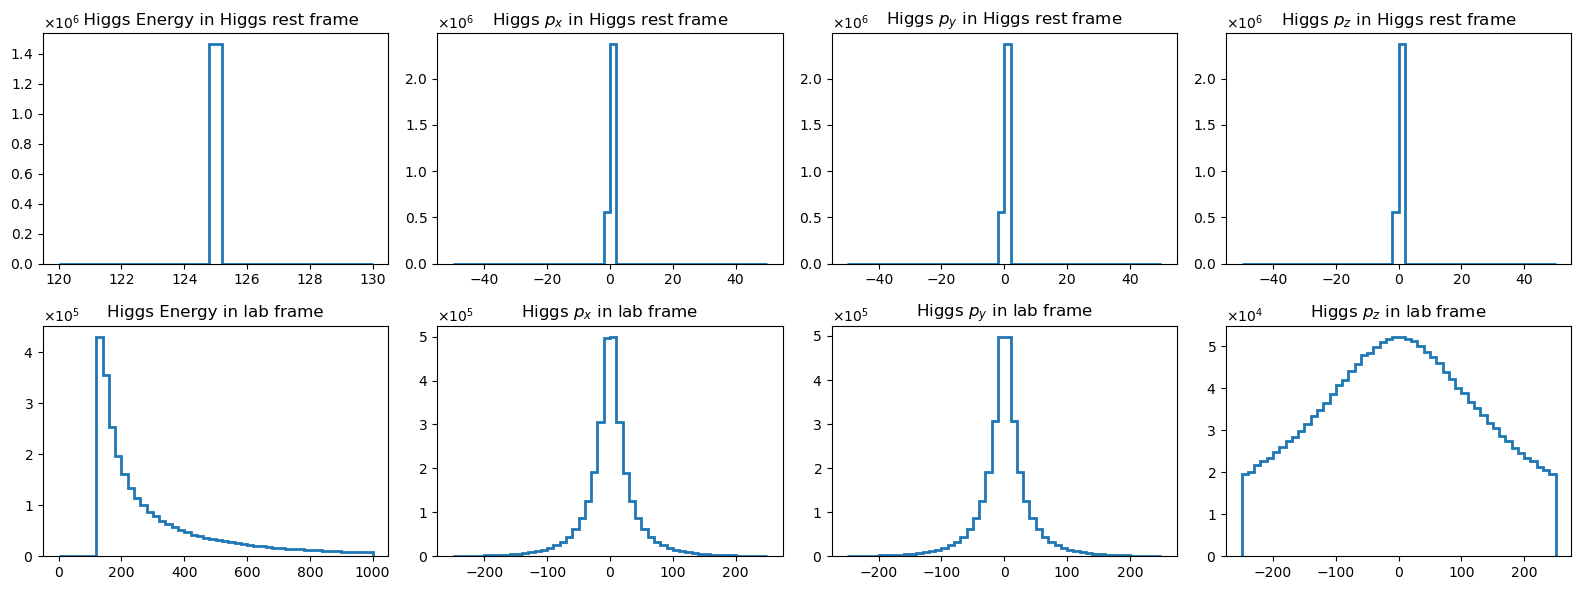

In [338]:
fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(16,6))
ax[0,0].set_title(r'  Higgs Energy in Higgs rest frame')
ax[0,0].hist(Higgs[ 'E_H'],histtype='step',bins=50,range=[120,130],label=r'$\ell^+$',lw=2)
ax[0,1].set_title(r'Higgs $p_x$ in Higgs rest frame')
ax[0,1].hist(Higgs['px_H'],histtype='step',bins=50,range=[-50,50],label=r'$\ell^+$',lw=2)
ax[0,2].set_title(r'Higgs $p_y$ in Higgs rest frame')
ax[0,2].hist(Higgs['py_H'],histtype='step',bins=50,range=[-50,50],label=r'$\ell^+$',lw=2)
ax[0,3].set_title(r'Higgs $p_z$ in Higgs rest frame')
ax[0,3].hist(Higgs['pz_H'],histtype='step',bins=50,range=[-50,50],label=r'$\ell^+$',lw=2)

ax[1,0].set_title(r'Higgs Energy in lab frame')
ax[1,0].hist(Higgs[ 'E'],histtype='step',bins=50,range=[0,1000],label=r'$\ell^+$',lw=2)
ax[1,1].set_title(r'Higgs $p_x$ in lab frame')
ax[1,1].hist(Higgs['px'],histtype='step',bins=50,range=[-250,250],label=r'$\ell^+$',lw=2)
ax[1,2].set_title(r'Higgs $p_y$ in lab frame')
ax[1,2].hist(Higgs['py'],histtype='step',bins=50,range=[-250,250],label=r'$\ell^+$',lw=2)
ax[1,3].set_title(r'Higgs $p_z$ in lab frame')
ax[1,3].hist(Higgs['pz'],histtype='step',bins=50,range=[-250,250],label=r'$\ell^+$',lw=2)
for i in range(2):
    for j in range (4):
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))

plt.tight_layout()

## Leptons in Higgs Rest Frame

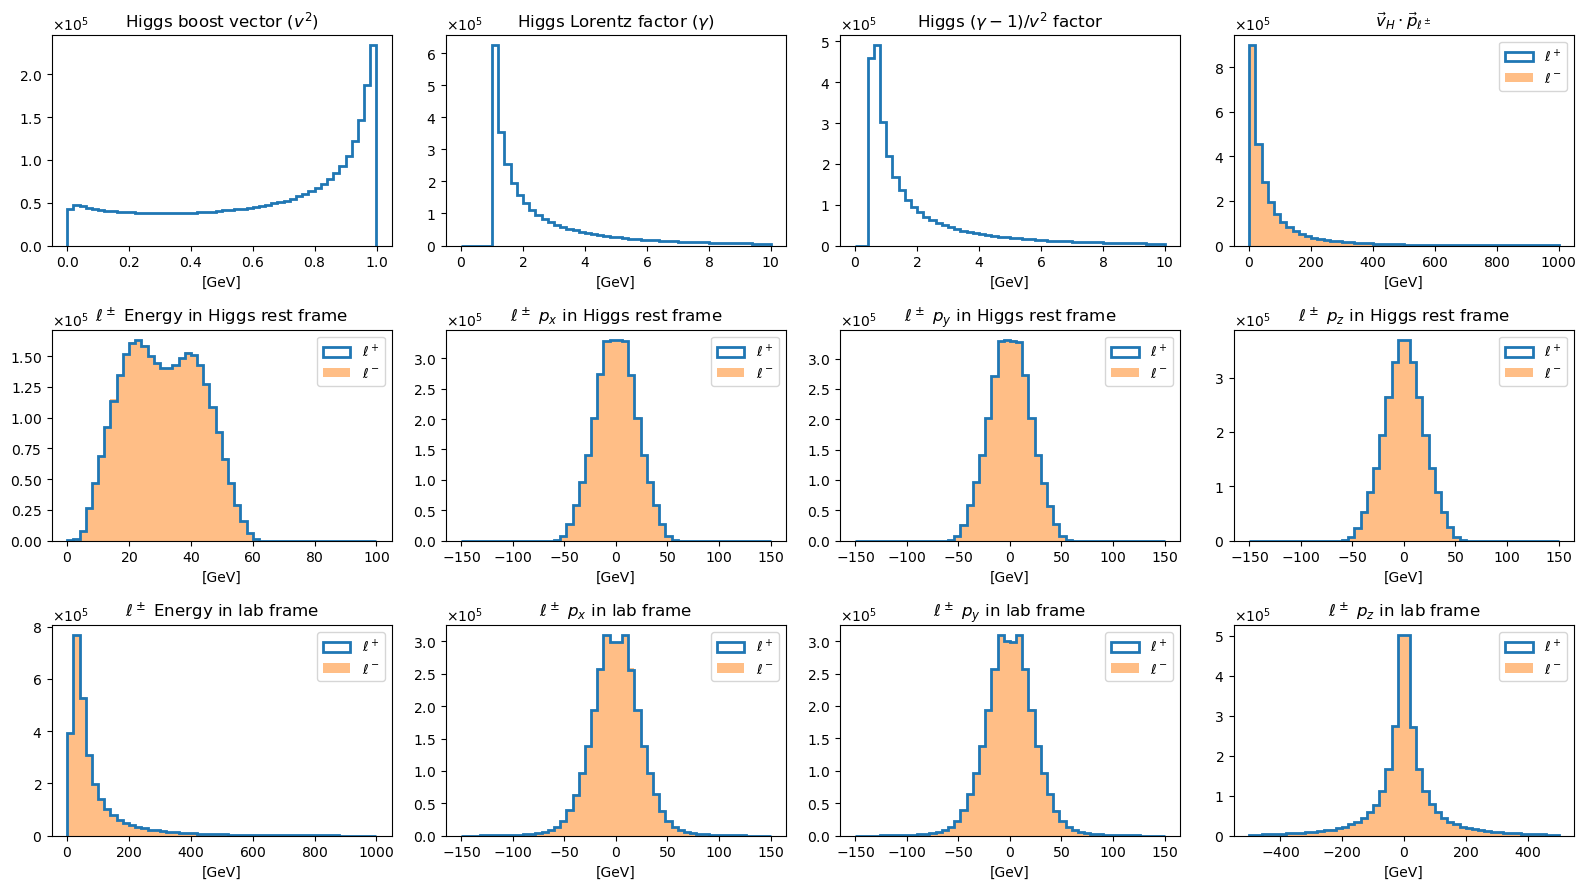

In [76]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16,9))
ax[0,0].set_title(r'Higgs boost vector ($v^2$)')
ax[0,1].set_title(r'Higgs Lorentz factor ($\gamma$)')
ax[0,0].hist(Higgs['v2'],histtype='step',bins=50,lw=2)
ax[0,1].hist(Higgs['gamma' ],histtype='step',bins=50,range=[0,10],lw=2)
ax[0,2].set_title(r'Higgs $(\gamma - 1)/v^2$ factor')
ax[0,2].hist(Higgs['gamma2'],histtype='step',bins=50,range=[0,10],lw=2)
ax[0,3].set_title(r'$\vec{v}_H \cdot \vec{p}_{\ell^\pm}$')
ax[0,3].hist(Higgs['vp_lp' ],histtype='step',bins=50,range=[0,1000],label=r'$\ell^+$',lw=2)
ax[0,3].hist(Higgs['vp_lm' ],histtype='bar' ,bins=50,range=[0,1000],label=r'$\ell^-$',alpha=0.5)

ax[1,0].set_title(r'$\ell^\pm$ Energy in Higgs rest frame')
ax[1,0].hist(LeptonP[ 'E_H'],histtype='step',bins=50,range=[0,100],label=r'$\ell^+$',lw=2)
ax[1,0].hist(LeptonM[ 'E_H'],histtype='bar' ,bins=50,range=[0,100],label=r'$\ell^-$',alpha=0.5)

ax[1,1].set_title(r'$\ell^\pm$ $p_x$ in Higgs rest frame')
ax[1,1].hist(LeptonP['px_H'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,1].hist(LeptonM['px_H'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[1,2].set_title(r'$\ell^\pm$ $p_y$ in Higgs rest frame')
ax[1,2].hist(LeptonP['py_H'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,2].hist(LeptonM['py_H'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[1,3].set_title(r'$\ell^\pm$ $p_z$ in Higgs rest frame')
ax[1,3].hist(LeptonP['pz_H'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,3].hist(LeptonM['pz_H'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)


ax[2,0].set_title(r'$\ell^\pm$ Energy in lab frame')
ax[2,0].hist(LeptonP[ 'E'],histtype='step',bins=50,range = [0,1000],label=r'$\ell^+$',lw=2)
ax[2,0].hist(LeptonM[ 'E'],histtype='bar' ,bins=50,range = [0,1000],label=r'$\ell^-$',alpha=0.5)

ax[2,1].set_title(r'$\ell^\pm$ $p_x$ in lab frame')
ax[2,1].hist(LeptonP['px'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[2,1].hist(LeptonM['px'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[2,2].set_title(r'$\ell^\pm$ $p_y$ in lab frame')
ax[2,2].hist(LeptonP['py'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[2,2].hist(LeptonM['py'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[2,3].set_title(r'$\ell^\pm$ $p_z$ in lab frame')
ax[2,3].hist(LeptonP['pz'],histtype='step',bins=50,range=[-500,500],label=r'$\ell^+$',lw=2)
ax[2,3].hist(LeptonM['pz'],histtype='bar' ,bins=50,range=[-500,500],label=r'$\ell^-$',alpha=0.5)


for i in range(3):
    for j in range(4):
        ax[i,j].set_xlabel('[GeV]')
        ax[i,j].ticklabel_format(axis='X', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        if( i > 0 or j > 2 ): ax[i,j].legend()
plt.tight_layout()

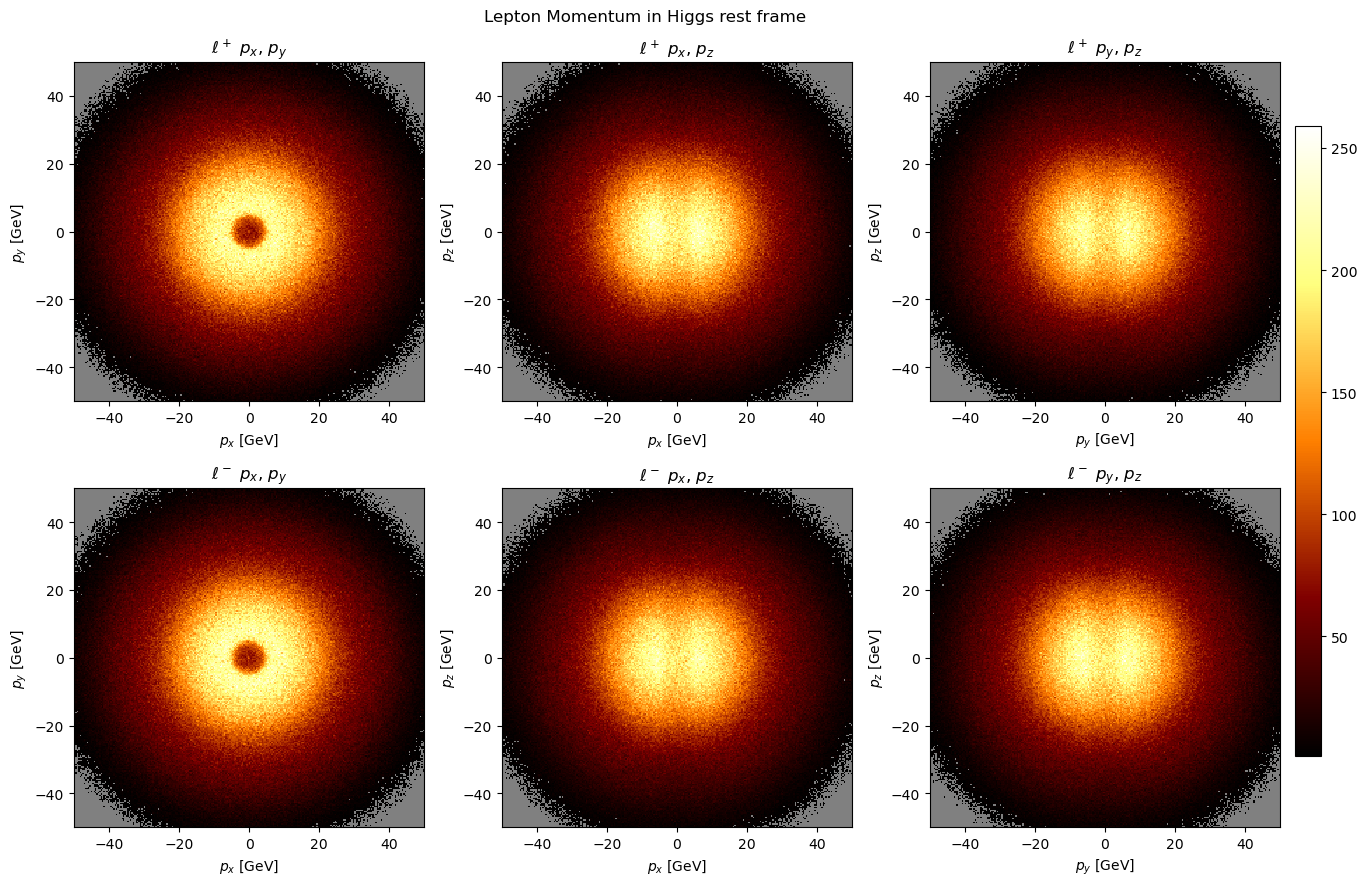

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13,9))
my_cmap = mpl.cm.get_cmap("afmhot").copy()
my_cmap.set_under('grey')
plt.suptitle("Lepton Momentum in Higgs rest frame")
comp = [r"$p_x$", r"$p_y$", r"$p_z$"]
Range=[[-50,50],[-50,50]]
Lepton_P = [LeptonP['px_H'], LeptonP['py_H'], LeptonP['pz_H']]
Lepton_M = [LeptonM['px_H'], LeptonM['py_H'], LeptonM['pz_H']]
ax_x = [0,0,1]
ax_y = [1,2,2]
for i in range(3):
    ax[0,i].hist2d(Lepton_P[ax_x[i]], Lepton_P[ax_y[i]], range=Range, vmin = 1, bins=250, cmap=my_cmap)
    ax[0,i].set_title(r"$\ell^+$ "+f"{comp[ax_x[i]]}, {comp[ax_y[i]]}")
    ax[0,i].set_ylabel(f"{comp[ax_y[i]]} [GeV]")
    ax[0,i].set_xlabel(f"{comp[ax_x[i]]} [GeV]")
    ax[1,i].hist2d(Lepton_M[ax_x[i]], Lepton_M[ax_y[i]], range=Range, vmin = 1, bins=250, cmap=my_cmap)
    ax[1,i].set_title(r"$\ell^-$ "+f"{comp[ax_x[i]]}, {comp[ax_y[i]]}")
    ax[1,i].set_ylabel(f"{comp[ax_y[i]]} [GeV]")
    ax[1,i].set_xlabel(f"{comp[ax_x[i]]} [GeV]")
plt.tight_layout()
counts, xedges, yedges, im  = ax[0,i].hist2d(Lepton_P[ax_x[i]], Lepton_P[ax_y[i]], vmin=1, range=Range, bins=250, cmap=my_cmap)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
fig.colorbar(im, cax = cbar_ax)

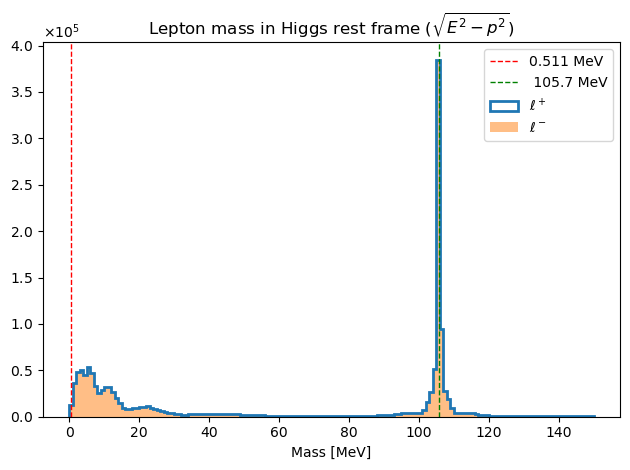

In [97]:
plt.plot(figsize=(6,6))
plt.title(r'Lepton mass in Higgs rest frame ($\sqrt{E^2 - p^2}$)')    
P_mass_H = np.sqrt(LeptonP['E_H'][idx]**2 - LeptonP['px_H'][idx]**2   - LeptonP['py_H'][idx]**2   - LeptonP['pz_H'][idx]**2)/GeV # using MeV as unit
M_mass_H = np.sqrt(LeptonM['E_H'][idx]**2 - LeptonM['px_H'][idx]**2   - LeptonM['py_H'][idx]**2   - LeptonM['pz_H'][idx]**2)/GeV # using MeV as unit
plt.hist(P_mass_H, histtype='step',bins=150,range=[0,150],label=r'$\ell^+$',lw=2)
plt.hist(M_mass_H, histtype='bar' ,bins=150,range=[0,150],label=r'$\ell^-$',alpha=0.5)

plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.axvline(0.511,label = r'0.511 MeV',ls='--',c='r',lw=1)
plt.axvline(105.7,label=r' 105.7 MeV',ls='--',c='g',lw=1)
plt.xlabel('Mass [MeV]')
plt.legend()
plt.tight_layout()
plt.show()

## Leptons in W Boson Rest Frame

* Transverse momentum ($p_T$)  
    * $p_T = \sqrt{{p_x}^2 + {p_y}^2}$  
    * $\phi = \arctan(p_y/p_x)$  
* Pseudorapidity ($\eta$)  
    * $\theta = \arctan(p_T/p_z)$   
    * $\eta \equiv -\ln (\theta/2)$  

### Angular variables (Transverse kinematics and pseudorapidity)  

In [24]:
def Boost_pT_eta_phi(particle,frame_label):
    pt  =  'pt_' + frame_label
    eta = 'phi_' + frame_label
    phi = 'eta_' + frame_label
    particle[pt ] =  np.sqrt(particle['px_' + frame_label]**2 + particle['py_' + frame_label]**2)
    particle[eta] =-1*np.log(0.5*np.arctan(np.abs(particle[pt]/particle['pz_' + frame_label])))
    particle[phi] =  np.arctan2(particle['py_' + frame_label],particle['px_' + frame_label])

In [25]:
Boost_pT_eta_phi(LeptonP  ,'W')
Boost_pT_eta_phi(LeptonM  ,'W')
Boost_pT_eta_phi(NeutrinoP,'W')
Boost_pT_eta_phi(NeutrinoM,'W')

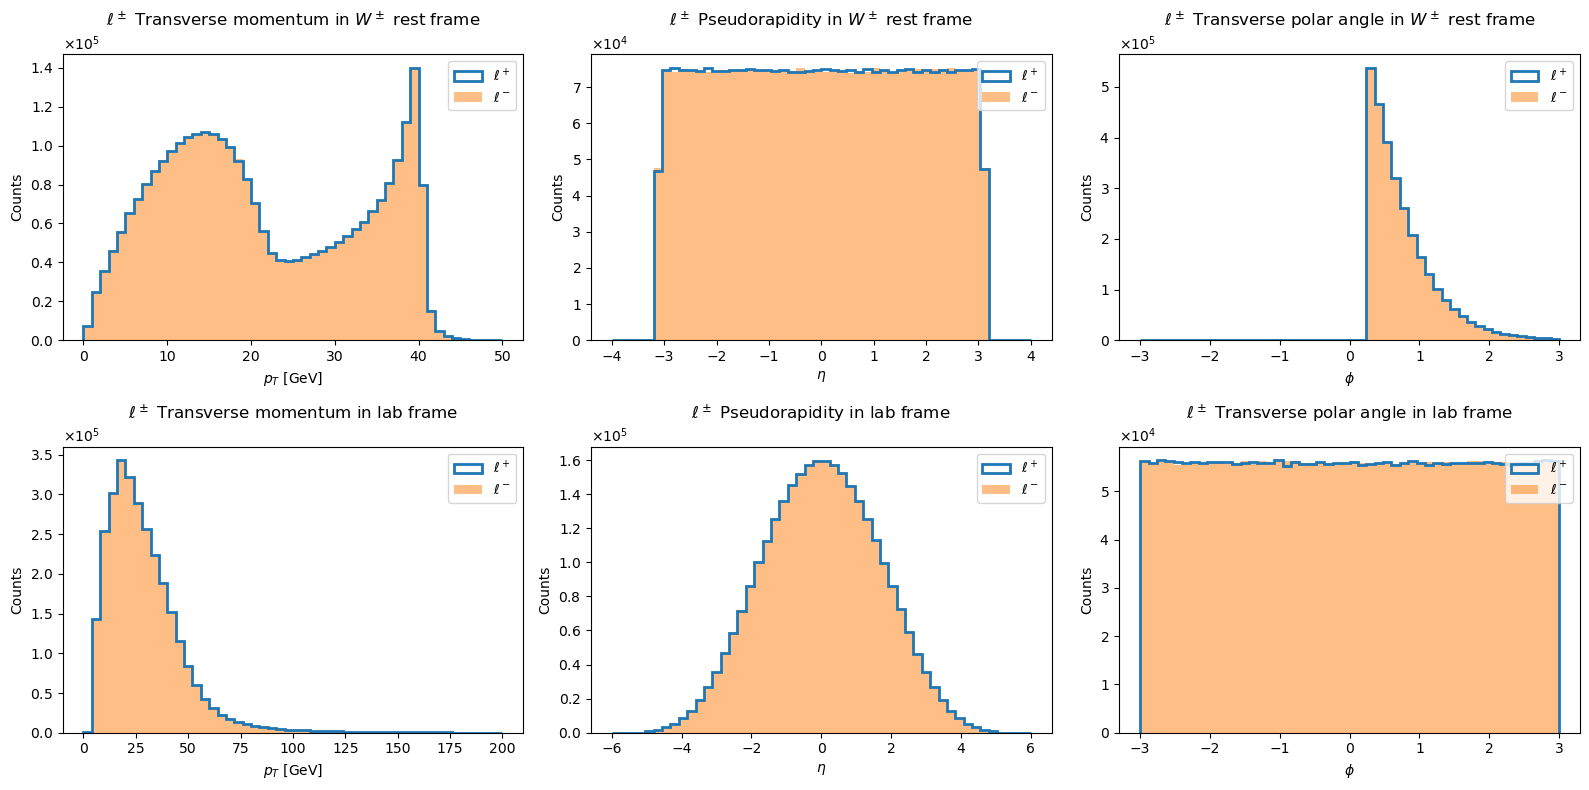

In [26]:
fig, ax = plt.subplots(ncols = 3,nrows = 2, figsize = (16,8
                                                      ),tight_layout=True)
label = ['pt','eta','phi']
x = [r'$p_T$ [GeV]', r'$\eta$', r'$\phi$']
x_range = [[[0, 50],[-4,4],[-3,3]],\
           [[0,200],[-6,6],[-3,3]]]
title = [r'Transverse momentum',r'Pseudorapidity',r'Transverse polar angle']
for i,j in enumerate(label):
    ax[0,i].set_title(r"$\ell^\pm$ "+title[i]+r' in $W^\pm$ rest frame',pad=20)
    ax[0,i].hist(LeptonP[j+'_W'],bins=50,histtype='step',lw=2,label=r'$\ell^+$',range=x_range[0][i])
    ax[0,i].hist(LeptonM[j+'_W'],bins=50,histtype='bar', alpha=0.5,label=r'$\ell^-$',range=x_range[0][i])
    ax[1,i].set_title(r"$\ell^\pm$ "+title[i]+r' in lab frame',pad=20)
    ax[1,i].hist(LeptonP[j],bins=50,histtype='step',lw=2,label=r'$\ell^+$',range=x_range[1][i])
    ax[1,i].hist(LeptonM[j],bins=50,histtype='bar', alpha=0.5,label=r'$\ell^-$',range=x_range[1][i])
    
for i in range(2):
    for j in range(3):
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].set_xlabel(x[j])
        ax[i,j].set_ylabel('Counts')
        ax[i,j].legend()


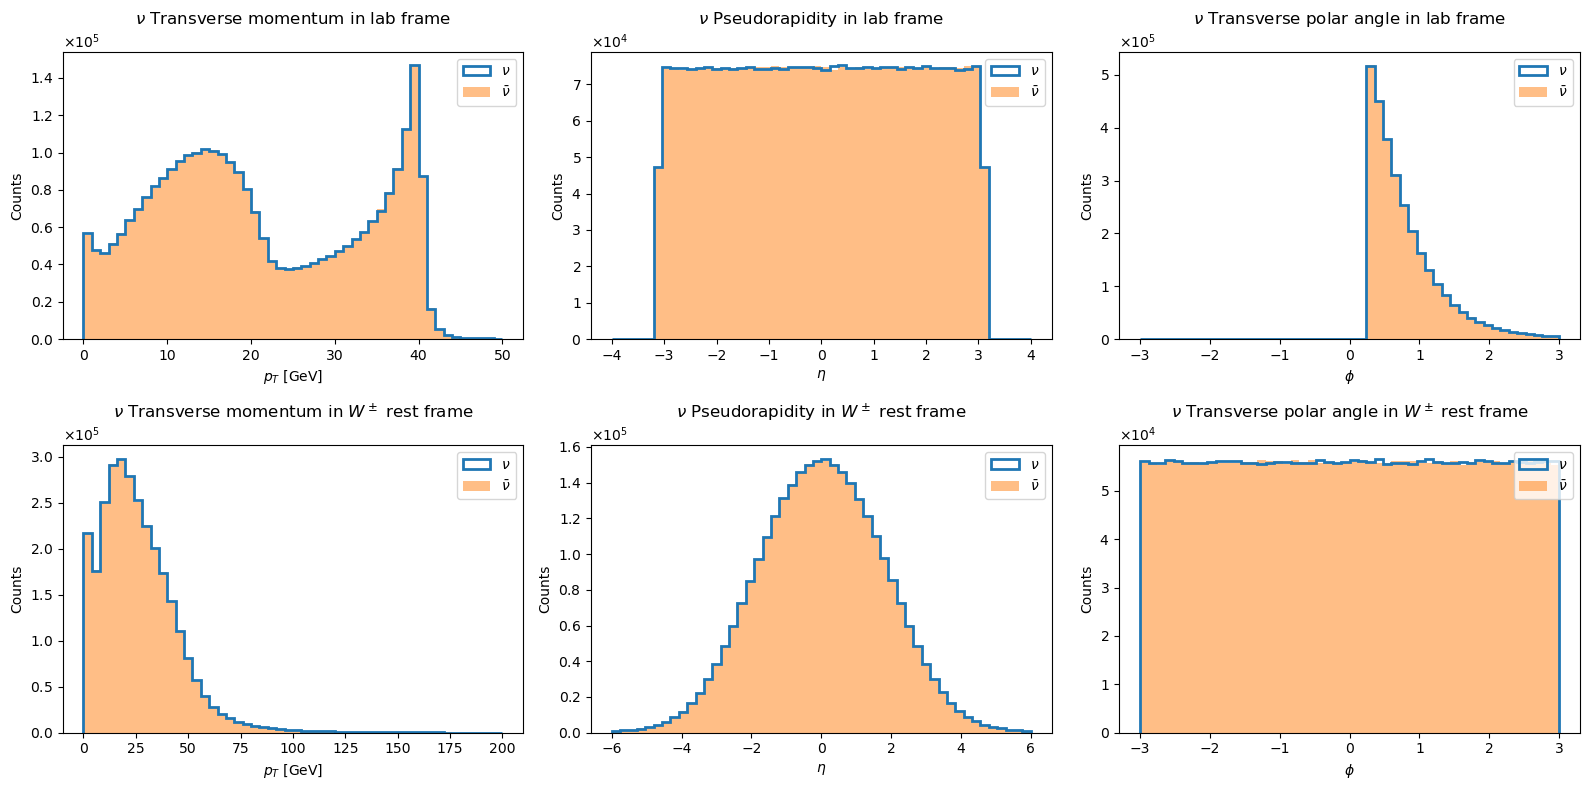

In [50]:
fig, ax = plt.subplots(ncols = 3,nrows = 2, figsize = (16,8),tight_layout=True)
labels= ['pt','eta','phi']
x = [r'$p_T$ [GeV]', r'$\eta$', r'$\phi$']
x_range = [[[0, 50],[-4,4],[-3,3]],\
           [[0,200],[-6,6],[-3,3]]]
title = [r'Transverse momentum',r'Pseudorapidity',r'Transverse polar angle']
for i,j in enumerate(labels):    
    ax[0,i].set_title(r"$\nu$ "+title[i]+r' in lab frame',pad=20)
    ax[0,i].hist(NeutrinoP[j+'_W'],bins=50,histtype='step',lw=2,label=r'$\nu$',range=x_range[0][i])
    ax[0,i].hist(NeutrinoM[j+'_W'],bins=50,histtype='bar', alpha=0.5,label=r'$\bar{\nu}$',range=x_range[0][i])
    ax[1,i].set_title(r"$\nu$ "+title[i]+r' in $W^\pm$ rest frame',pad=20)
    ax[1,i].hist(NeutrinoP[j],bins=50,histtype='step',lw=2,label=r'$\nu$',range=x_range[1][i])
    ax[1,i].hist(NeutrinoM[j],bins=50,histtype='bar', alpha=0.5,label=r'$\bar{\nu}$',range=x_range[1][i])
for i in range(2):
    for j in range(3):
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].set_xlabel(x[j])
        ax[i,j].set_ylabel('Counts')
        ax[i,j].legend()


### Pairwise features in lab frame

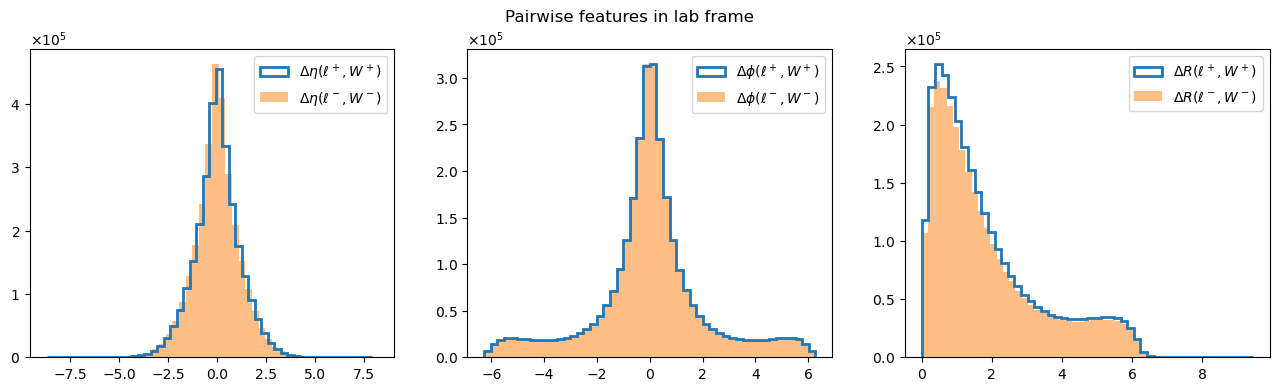

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,4))
plt.suptitle("Pairwise features in lab frame")
ax = ax.flatten()
ax[0].set_title("")
ax[0].hist((LeptonP['eta'] - WBosonP['eta']),bins=50,histtype='step',lw=2, label=r'$\Delta \eta (\ell^+, W^+)$')
ax[0].hist((LeptonM['eta'] - WBosonM['eta']),bins=50,histtype='bar', alpha=0.5, label=r'$\Delta \eta (\ell^-, W^-)$')
ax[1].hist((LeptonP['phi'] - WBosonP['phi']),bins=50,histtype='step',lw=2, label=r'$\Delta \phi (\ell^+, W^+)$')
ax[1].hist((LeptonM['phi'] - WBosonM['phi']),bins=50,histtype='bar', alpha=0.5, label=r'$\Delta \phi (\ell^-, W^-)$')
lwp_dR = np.sqrt((LeptonP['eta'] - WBosonP['eta'])**2 + (LeptonP['phi'] - WBosonP['phi'])**2)
lwm_dR = np.sqrt((LeptonM['eta'] - WBosonM['eta'])**2 + (LeptonM['phi'] - WBosonM['phi'])**2)
ax[2].hist(lwp_dR, bins = 50, histtype='step',lw=2, label=r'$\Delta R (\ell^+, W^+)$')
ax[2].hist(lwm_dR, bins = 50, histtype='bar', alpha=0.5, label=r'$\Delta R (\ell^-, W^-)$')
for i in ax:
    i.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    i.legend()
plt.show()

In [28]:
print(len(lwp_dR), len(lwm_dR))

2928862 2928862


### Kinematics

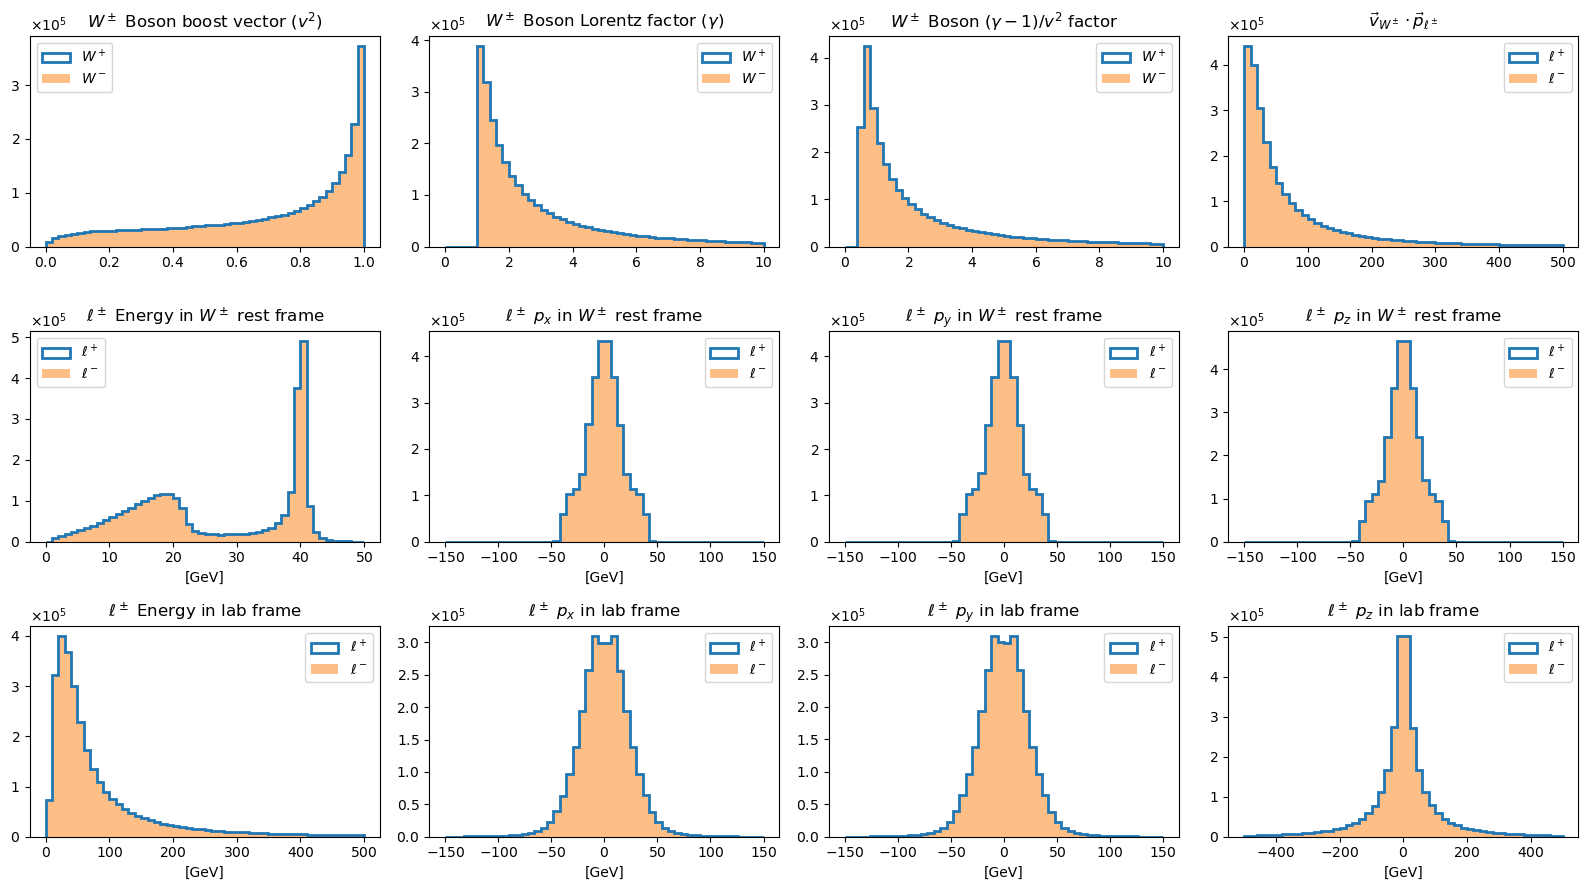

In [75]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16,9))
ax[0,0].set_title(r'$W^\pm$ Boson boost vector ($v^2$)')
ax[0,0].hist(WBosonP['v2'],histtype='step',bins=50,label='$W^+$',lw=2)
ax[0,0].hist(WBosonM['v2'],histtype='bar' ,bins=50,label='$W^-$',alpha=0.5)

ax[0,1].set_title(r'$W^\pm$ Boson Lorentz factor ($\gamma$)')
ax[0,1].hist(WBosonP['gamma' ],histtype='step',bins=50,range=[0,10],label='$W^+$',lw=2)
ax[0,1].hist(WBosonM['gamma' ],histtype='bar' ,bins=50,range=[0,10],label='$W^-$',alpha=0.5)

ax[0,2].set_title(r'$W^\pm$ Boson $(\gamma - 1)/v^2$ factor')
ax[0,2].hist(WBosonP['gamma2'],histtype='step',bins=50,range=[0,10],label='$W^+$',lw=2)
ax[0,2].hist(WBosonM['gamma2'],histtype='bar' ,bins=50,range=[0,10],label='$W^-$',alpha=0.5)


ax[0,3].set_title(r'$\vec{v}_{W^\pm} \cdot \vec{p}_{\ell^\pm}$')
ax[0,3].hist(WBosonP['vp_lp' ],histtype='step',bins=50,range=[0,500],label=r'$\ell^+$',lw=2)
ax[0,3].hist(WBosonM['vp_lm' ],histtype='bar' ,bins=50,range=[0,500],label=r'$\ell^-$',alpha=0.5)


ax[1,0].set_title(r'$\ell^\pm$ Energy in $W^\pm$ rest frame')
ax[1,0].hist(LeptonP[ 'E_W'],histtype='step',bins=50,range = [0,50],label=r'$\ell^+$',lw=2)
ax[1,0].hist(LeptonM[ 'E_W'],histtype='bar' ,bins=50,range = [0,50],label=r'$\ell^-$',alpha=0.5)

ax[1,1].set_title(r'$\ell^\pm$ $p_x$ in $W^\pm$ rest frame')
ax[1,1].hist(LeptonP['px_W'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,1].hist(LeptonM['px_W'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[1,2].set_title(r'$\ell^\pm$ $p_y$ in $W^\pm$ rest frame')
ax[1,2].hist(LeptonP['py_W'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,2].hist(LeptonM['py_W'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[1,3].set_title(r'$\ell^\pm$ $p_z$ in $W^\pm$ rest frame')
ax[1,3].hist(LeptonP['pz_W'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[1,3].hist(LeptonM['pz_W'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[2,0].set_title(r'$\ell^\pm$ Energy in lab frame')
ax[2,0].hist(LeptonP[ 'E'],histtype='step',bins=50,range = [0,500],label=r'$\ell^+$',lw=2)
ax[2,0].hist(LeptonM[ 'E'],histtype='bar' ,bins=50,range = [0,500],label=r'$\ell^-$',alpha=0.5)

ax[2,1].set_title(r'$\ell^\pm$ $p_x$ in lab frame')
ax[2,1].hist(LeptonP['px'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[2,1].hist(LeptonM['px'],histtype='bar', bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[2,2].set_title(r'$\ell^\pm$ $p_y$ in lab frame')
ax[2,2].hist(LeptonP['py'],histtype='step',bins=50,range=[-150,150],label=r'$\ell^+$',lw=2)
ax[2,2].hist(LeptonM['py'],histtype='bar' ,bins=50,range=[-150,150],label=r'$\ell^-$',alpha=0.5)

ax[2,3].set_title(r'$\ell^\pm$ $p_z$ in lab frame')
ax[2,3].hist(LeptonP['pz'],histtype='step',bins=50,range=[-500,500],label=r'$\ell^+$',lw=2)
ax[2,3].hist(LeptonM['pz'],histtype='bar' ,bins=50,range=[-500,500],label=r'$\ell^-$',alpha=0.5)

for i in range(3):
    for j in range(4):
        if i != 0: ax[i,j].set_xlabel('[GeV]')
        ax[i,j].ticklabel_format(axis='X', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].legend(loc='best')
plt.tight_layout()

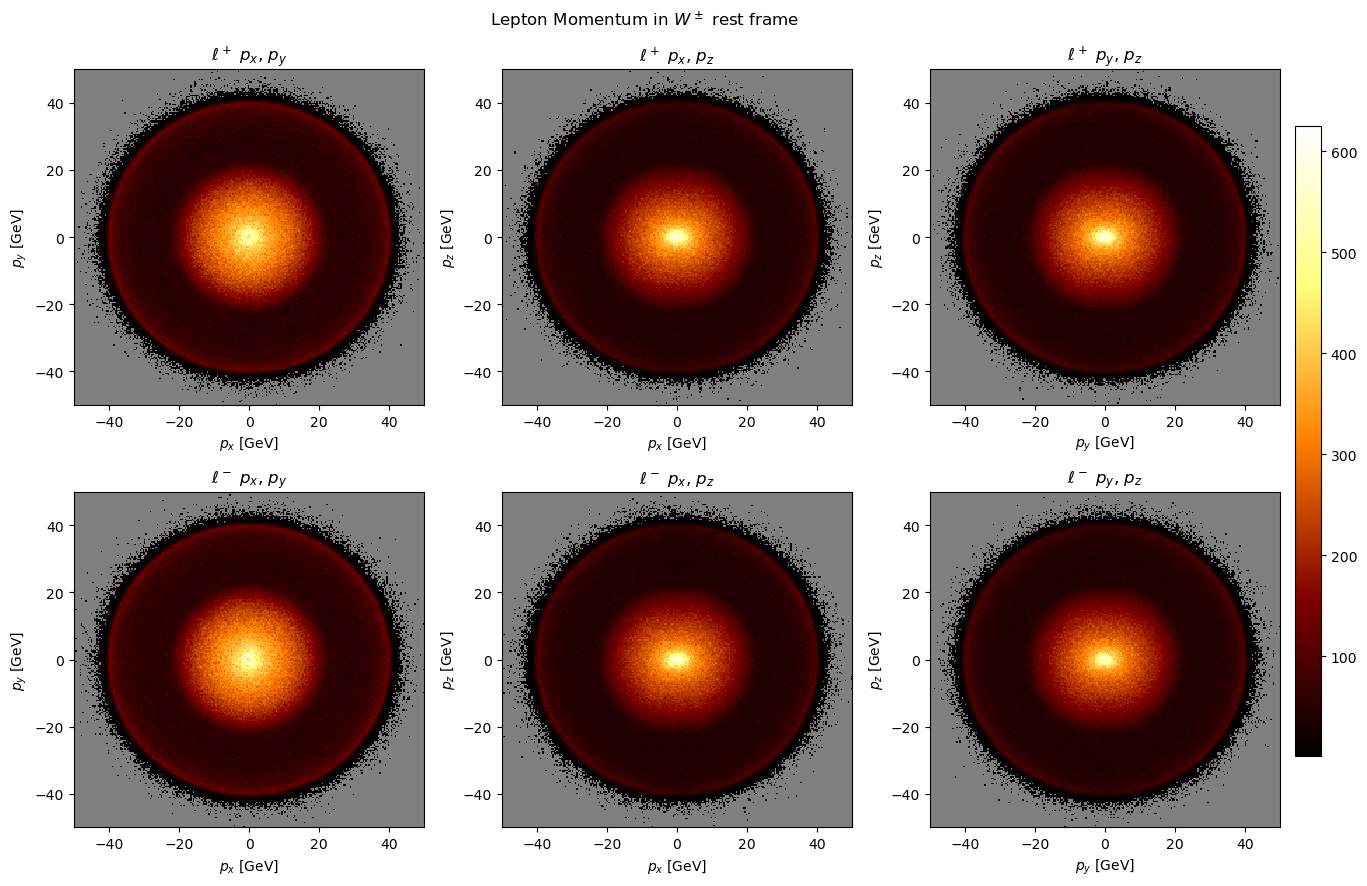

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13,9))
my_cmap = mpl.cm.get_cmap("afmhot").copy()
my_cmap.set_under('grey')
plt.suptitle("Lepton Momentum in $W^\pm$ rest frame")
comp = [r"$p_x$", r"$p_y$", r"$p_z$"]
Range=[[-50,50],[-50,50]]
Lepton_P = [LeptonP['px_W'], LeptonP['py_W'], LeptonP['pz_W']]
Lepton_M = [LeptonM['px_W'], LeptonM['py_W'], LeptonM['pz_W']]
ax_x = [0,0,1]
ax_y = [1,2,2]
for i in range(3):
    ax[0,i].hist2d(Lepton_P[ax_x[i]], Lepton_P[ax_y[i]], range=Range,vmin=1, bins=250, cmap='afmhot')
    ax[0,i].set_title(r"$\ell^+$ "+f"{comp[ax_x[i]]}, {comp[ax_y[i]]}")
    ax[0,i].set_ylabel(f"{comp[ax_y[i]]} [GeV]")
    ax[0,i].set_xlabel(f"{comp[ax_x[i]]} [GeV]")
    ax[1,i].hist2d(Lepton_M[ax_x[i]], Lepton_M[ax_y[i]], range=Range,vmin=1, bins=250, cmap='afmhot')
    ax[1,i].set_title(r"$\ell^-$ "+f"{comp[ax_x[i]]}, {comp[ax_y[i]]}")
    ax[1,i].set_ylabel(f"{comp[ax_y[i]]} [GeV]")
    ax[1,i].set_xlabel(f"{comp[ax_x[i]]} [GeV]")

counts, xedges, yedges, im  = ax[0,i].hist2d(Lepton_P[ax_x[i]], Lepton_P[ax_y[i]], range=Range,vmin=1, bins=250, cmap='afmhot')
plt.tight_layout()
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
fig.colorbar(im, cax = cbar_ax)


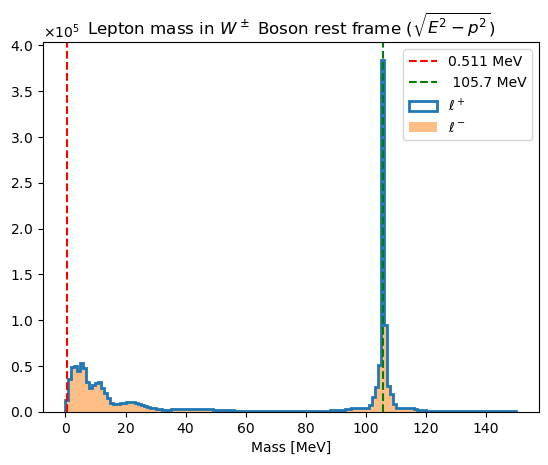

In [221]:
plt.plot(figsize=(6,6))
plt.title(r'Lepton mass in $W^\pm$ Boson rest frame ($\sqrt{E^2 - p^2}$)')    
P_mass_W = np.sqrt(LeptonP['E_W'][idx]**2 - LeptonP['px_W'][idx]**2   - LeptonP['py_W'][idx]**2   - LeptonP['pz_W'][idx]**2)/GeV # using MeV as unit
M_mass_W = np.sqrt(LeptonM['E_W'][idx]**2 - LeptonM['px_W'][idx]**2   - LeptonM['py_W'][idx]**2   - LeptonM['pz_W'][idx]**2)/GeV # using MeV as unit
plt.hist(P_mass_W, histtype='step',bins=150,range=[0,150],label=r'$\ell^+$',lw=2)
plt.hist(M_mass_W, histtype='bar',bins=150,range=[0,150],label=r'$\ell^-$',alpha=0.5)
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.axvline(0.511,label = r'0.511 MeV',ls='--',c='r')
plt.axvline(105.7,label=r' 105.7 MeV',ls='--',c='g')
plt.xlabel('Mass [MeV]')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
A = np.where(LeptonP['E_W']**2 - LeptonP['pz_W']**2 - LeptonP['pz_W']**2 - LeptonP['pz_W']**2 > 0, True, False)
np.unique(A,return_counts=True)

(array([False,  True]), array([1169529, 1759333]))

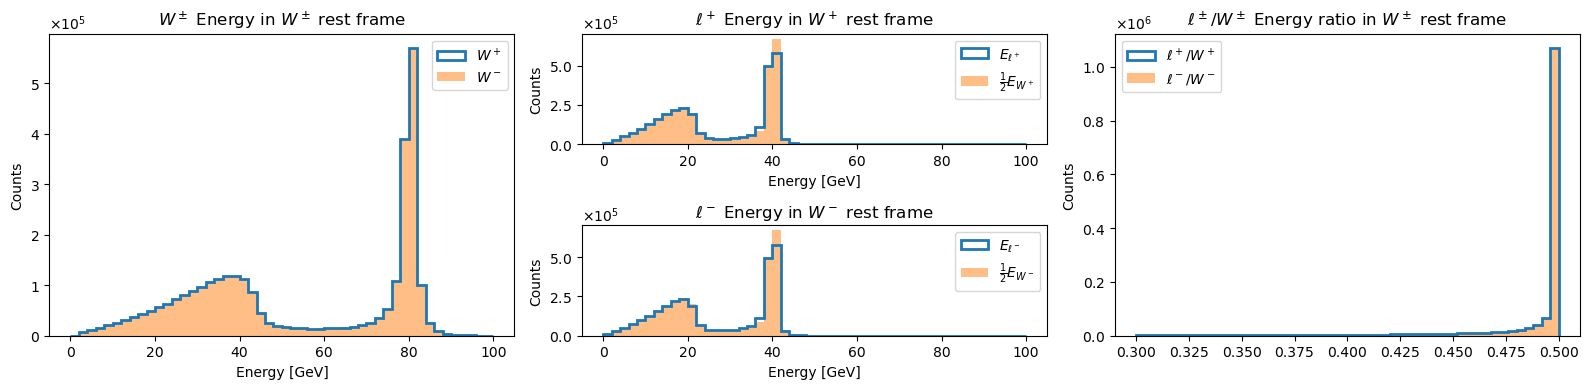

In [55]:
fig = plt.figure(figsize = (16,4))
gs = gridspec.GridSpec(2, 3)
axes = []
ax = fig.add_subplot(gs[:,0])
ax.set_title(   r"$W^\pm$ Energy in $W^\pm$ rest frame")
ax.hist(WBosonP['E_W'],bins=50,range=[0,100],histtype='step',lw=2,label='$W^+$')
ax.hist(WBosonM['E_W'],bins=50,range=[0,100],histtype='bar',alpha=0.5,label='$W^-$')
ax.set_xlabel("Energy [GeV]")
axes.append(ax)
ax = fig.add_subplot(gs[0,1])
ax.set_title(r"$\ell^+$ Energy in $W^+$ rest frame")
ax.hist(LeptonP['E_W'],label=r'$E_{\ell^+}$',bins=50,range=[0,100],histtype='step',lw=2)
ax.hist(WBosonP['E_W']*0.5,label=r'$\frac{1}{2}E_{W^+}$',bins=50,range=[0,100],histtype='bar',alpha=0.5)
ax.set_xlabel("Energy [GeV]")
axes.append(ax)
ax = fig.add_subplot(gs[1,1])
ax.set_title(r"$\ell^-$ Energy in $W^-$ rest frame")
ax.hist(LeptonM['E_W'],label=r'$E_{\ell^-}$',bins=50,range=[0,100],histtype='step',lw=2)
ax.hist(WBosonM['E_W']*0.5,label=r'$\frac{1}{2}E_{W^-}$',bins=50,range=[0,100],histtype='bar',alpha=0.5)
ax.set_xlabel("Energy [GeV]")
axes.append(ax)
ax = fig.add_subplot(gs[:,2])
ax.set_title(r"$\ell^\pm/W^\pm$ Energy ratio in $W^\pm$ rest frame")
ax.hist(LeptonP['E_W']/WBosonP['E_W'],bins=50, histtype='step',range=[0.3,0.5],lw=2,label=r'$\ell^+/W^+$')
ax.hist(LeptonM['E_W']/WBosonM['E_W'],bins=50, histtype='bar',range=[0.3,0.5],alpha=0.5,label=r'$\ell^-/W^-$')
axes.append(ax)
for i in axes:
    i.set_ylabel("Counts")
    i.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    i.legend()
plt.tight_layout()
plt.show()

Text(0.5, 0, '$\\ell^+$ Energy in $W^+$ rest frame [GeV]')

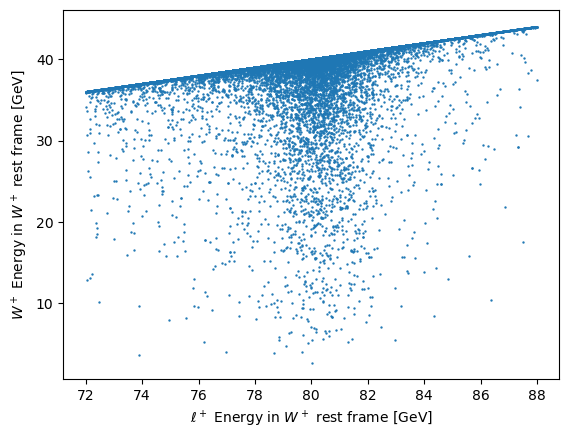

In [329]:
N = 100000
random_W = np.random.choice(len(LeptonP['E_W']),N)
on_shell_W =  np.where(np.abs(WBosonP['E_W'][random_W]-80) < 8, True, False)
plt.scatter(WBosonP['E_W'][random_W][on_shell_W],LeptonP['E_W'][random_W][on_shell_W],s=0.5)
plt.ylabel('$W^+$ Energy in $W^+$ rest frame [GeV]')
plt.xlabel('$\ell^+$ Energy in $W^+$ rest frame [GeV]')

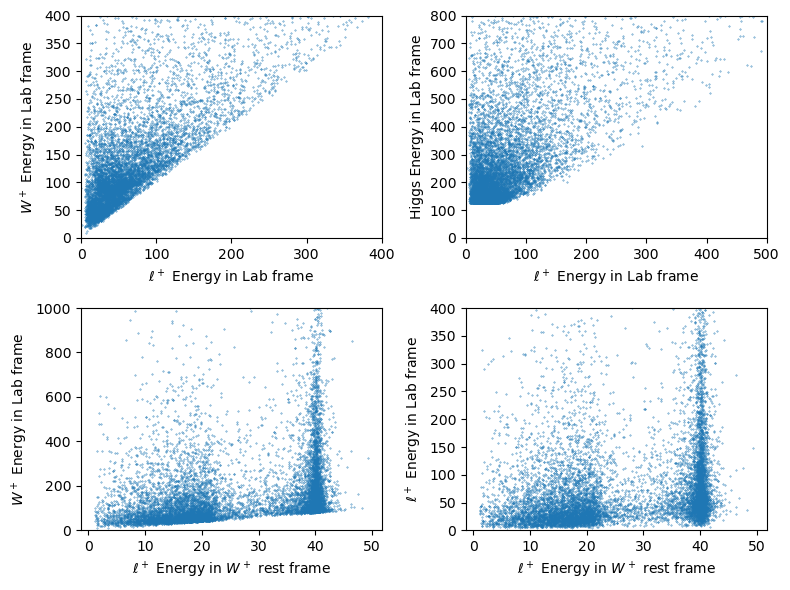

In [107]:
N = 10000
random_LP = np.random.choice(len(LeptonP['E_W']),N)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax[0,0].scatter(LeptonP['E'][random_LP],WBosonP['E'][random_LP],s=0.1)
ax[0,0].set_xlabel(r'$\ell^+$ Energy in Lab frame')
ax[0,0].set_ylabel(r'$W^+$ Energy in Lab frame')
ax[0,0].set_xlim([0,400])
ax[0,0].set_ylim([0,400])
ax[0,1].scatter(LeptonP['E'][random_LP],Higgs['E'][random_LP],s=0.1)
ax[0,1].set_xlabel(r'$\ell^+$ Energy in Lab frame')
ax[0,1].set_ylabel(r'Higgs Energy in Lab frame')
ax[0,1].set_xlim([0,500])
ax[0,1].set_ylim([0,800])
ax[1,0].scatter(LeptonP['E_W'][random_LP],WBosonP['E'][random_LP],s=0.1)
ax[1,0].set_xlabel(r'$\ell^+$ Energy in $W^+$ rest frame')
ax[1,0].set_ylabel(r'$W^+$ Energy in Lab frame')
ax[1,0].set_ylim([0,1000])
ax[1,1].scatter(LeptonP['E_W'][random_LP],LeptonP['E'][random_LP],s=0.1)
ax[1,1].set_ylim([0,400])
ax[1,1].set_xlabel(r'$\ell^+$ Energy in $W^+$ rest frame')
ax[1,1].set_ylabel(r'$\ell^+$ Energy in Lab frame')
plt.tight_layout()

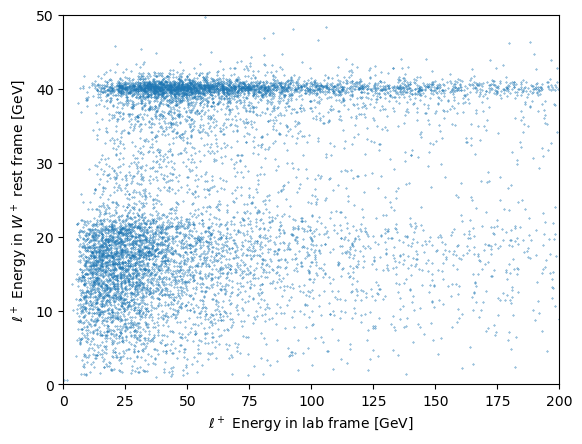

In [88]:
N = 10000
random_LP = np.random.choice(len(LeptonP['E_W']),N)
plt.scatter(LeptonP['E'][random_LP],LeptonP['E_W'][random_LP],s=0.1)
plt.xlim([0,200])
plt.ylim([0,50])
plt.xlabel(r"$\ell^+$ Energy in lab frame [GeV]")
plt.ylabel(r"$\ell^+$ Energy in $W^+$ rest frame [GeV]")
#plt.xlim([0,100])
plt.show()

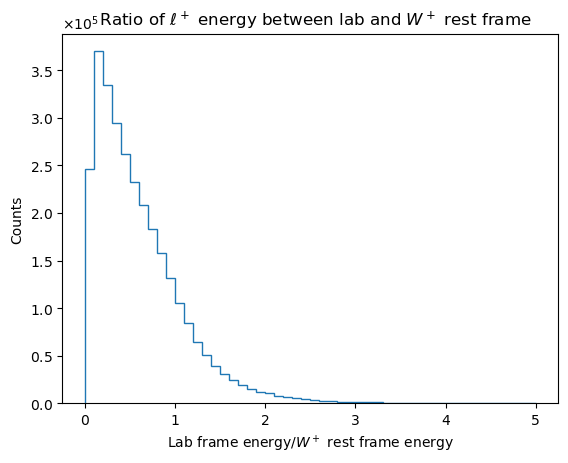

In [48]:
plt.hist(LeptonP['E_W']/LeptonP['E'],bins=50,histtype='step',range=[0,5])
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.title(r'  Ratio of $\ell^+$ energy between lab and $W^+$ rest frame')
plt.ylabel('Counts')
plt.xlabel(r'Lab frame energy/$W^+$ rest frame energy')
plt.show()

In [ ]:
N = 10000
random_LP = np.random.choice(len(LeptonP['E_W']),N)
plt.scatter(LeptonP['E'][random_LP],WBoson['E_W'][random_LP],s=1)
plt.xlabel(r'$\ell^+$ Energy in Lab frame')
plt.ylabel(r'$\ell^+$ Energy in $W^+$ rest frame')

## Neutrinos in W Boson rest frame

### Kinematics

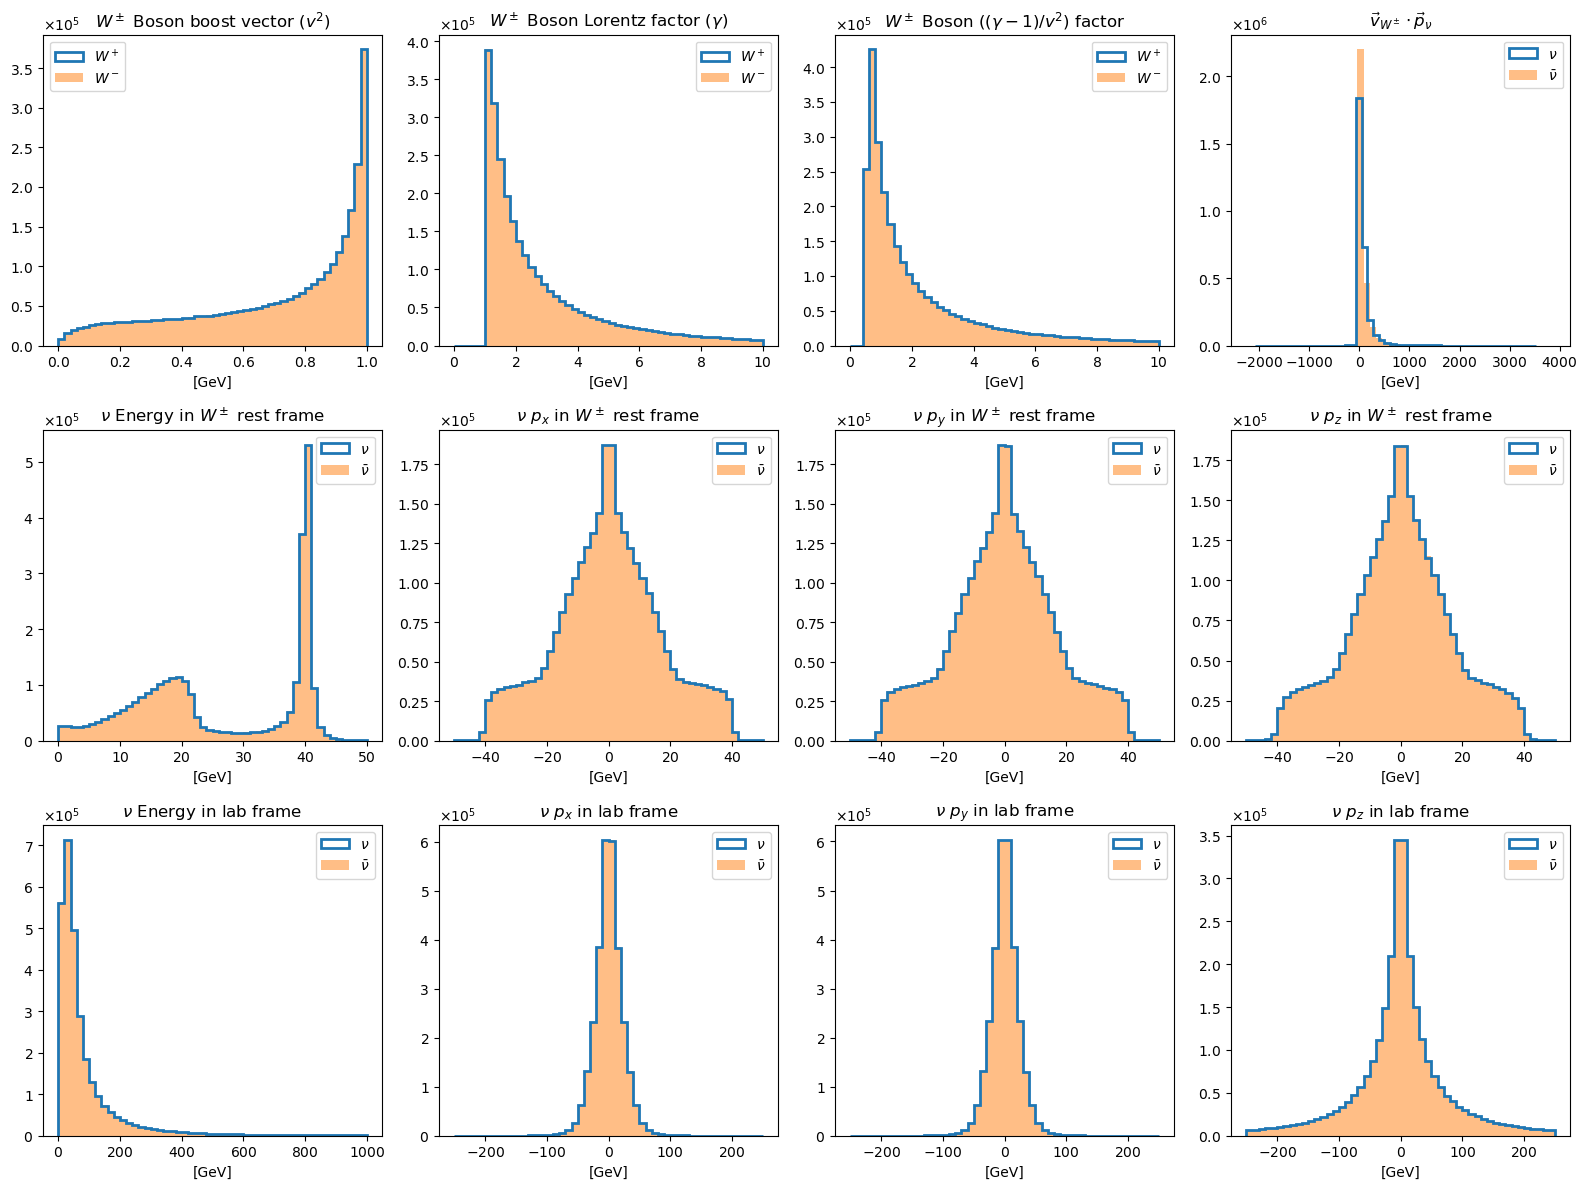

In [344]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16,12))
ax[0,0].set_title(r'$W^\pm$ Boson boost vector ($v^2$)')
ax[0,0].hist(WBosonP['v2'],histtype='step',bins=50,label='$W^+$',lw=2)
ax[0,0].hist(WBosonM['v2'],histtype='bar' ,bins=50,label='$W^-$',alpha=0.5)

ax[0,1].set_title(r'$W^\pm$ Boson Lorentz factor ($\gamma$)')
ax[0,1].hist(WBosonP['gamma' ],histtype='step',bins=50,range=[0,10],label='$W^+$',lw=2)
ax[0,1].hist(WBosonM['gamma' ],histtype='bar' ,bins=50,range=[0,10],label='$W^-$',alpha=0.5)

ax[0,2].set_title(r'$W^\pm$ Boson ($(\gamma - 1)/v^2$) factor')
ax[0,2].hist(WBosonP['gamma2'],histtype='step',bins=50,range=[0,10],label='$W^+$',lw=2)
ax[0,2].hist(WBosonM['gamma2'],histtype='bar' ,bins=50,range=[0,10],label='$W^-$',alpha=0.5)


ax[0,3].set_title(r'$\vec{v}_{W^\pm} \cdot \vec{p}_{\nu}$')
ax[0,3].hist(WBosonP['vp_nup' ],histtype='step',bins=50,label=r'$\nu$',lw=2)
ax[0,3].hist(WBosonM['vp_num' ],histtype='bar' ,bins=50,label=r'$\bar{\nu}$',alpha=0.5)


ax[1,0].set_title(r'$\nu$ Energy in $W^\pm$ rest frame')
ax[1,0].hist(NeutrinoP[ 'E_W'],histtype='step',bins=50,range = [0,50],label=r'$\nu$',lw=2)
ax[1,0].hist(NeutrinoM[ 'E_W'],histtype='bar' ,bins=50,range = [0,50],label=r'$\bar{\nu}$',alpha=0.5)

ax[1,1].set_title(r'$\nu$ $p_x$ in $W^\pm$ rest frame')
ax[1,1].hist(NeutrinoP['px_W'],histtype='step',bins=50,range=[-50,50],label=r'$\nu$',lw=2)
ax[1,1].hist(NeutrinoM['px_W'],histtype='bar' ,bins=50,range=[-50,50],label=r'$\bar{\nu}$',alpha=0.5)

ax[1,2].set_title(r'$\nu$ $p_y$ in $W^\pm$ rest frame')
ax[1,2].hist(NeutrinoP['py_W'],histtype='step',bins=50,range=[-50,50],label=r'$\nu$',lw=2)
ax[1,2].hist(NeutrinoM['py_W'],histtype='bar' ,bins=50,range=[-50,50],label=r'$\bar{\nu}$',alpha=0.5)

ax[1,3].set_title(r'$\nu$ $p_z$ in $W^\pm$ rest frame')
ax[1,3].hist(NeutrinoP['pz_W'],histtype='step',bins=50,range=[-50,50],label=r'$\nu$',lw=2)
ax[1,3].hist(NeutrinoM['pz_W'],histtype='bar' ,bins=50,range=[-50,50],label=r'$\bar{\nu}$',alpha=0.5)

ax[2,0].set_title(r'$\nu$ Energy in lab frame')
ax[2,0].hist(NeutrinoP[ 'E'],histtype='step',bins=50,range = [0,1000],label=r'$\nu$',lw=2)
ax[2,0].hist(NeutrinoM[ 'E'],histtype='bar' ,bins=50,range = [0,1000],label=r'$\bar{\nu}$',alpha=0.5)

ax[2,1].set_title(r'$\nu$ $p_x$ in lab frame')
ax[2,1].hist(NeutrinoP['px'],histtype='step',bins=50,range=[-250,250],label=r'$\nu$',lw=2)
ax[2,1].hist(NeutrinoM['px'],histtype='bar', bins=50,range=[-250,250],label=r'$\bar{\nu}$',alpha=0.5)

ax[2,2].set_title(r'$\nu$ $p_y$ in lab frame')
ax[2,2].hist(NeutrinoP['py'],histtype='step',bins=50,range=[-250,250],label=r'$\nu$',lw=2)
ax[2,2].hist(NeutrinoM['py'],histtype='bar' ,bins=50,range=[-250,250],label=r'$\bar{\nu}$',alpha=0.5)

ax[2,3].set_title(r'$\nu$ $p_z$ in lab frame')
ax[2,3].hist(NeutrinoP['pz'],histtype='step',bins=50,range=[-250,250],label=r'$\nu$',lw=2)
ax[2,3].hist(NeutrinoM['pz'],histtype='bar' ,bins=50,range=[-250,250],label=r'$\bar{\nu}$',alpha=0.5)

for i in range(3):
    for j in range(4):
        ax[i,j].set_xlabel('[GeV]')
        ax[i,j].ticklabel_format(axis='X', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].legend(loc='best')
plt.tight_layout()

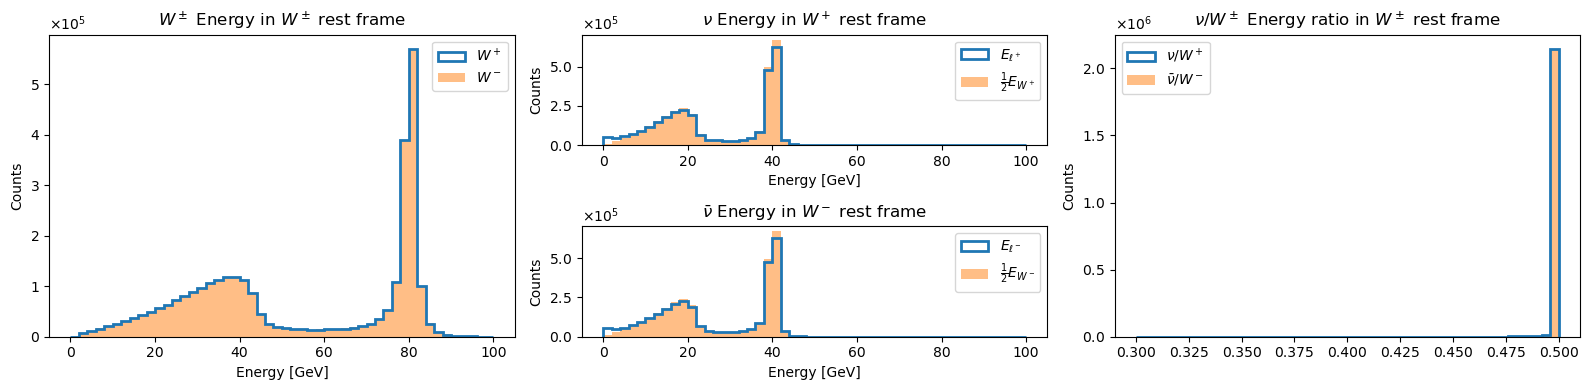

In [102]:
fig = plt.figure(figsize = (16,4))
gs = gridspec.GridSpec(2, 3)
axes = []
ax = fig.add_subplot(gs[:,0])
ax.set_title(   r"$W^\pm$ Energy in $W^\pm$ rest frame")
ax.hist(WBosonP['E_W'],bins=50,range=[0,100],histtype='step',lw=2,label='$W^+$')
ax.hist(WBosonM['E_W'],bins=50,range=[0,100],histtype='bar',alpha=0.5,label='$W^-$')
ax.set_xlabel("Energy [GeV]")
axes.append(ax)
ax = fig.add_subplot(gs[0,1])
ax.set_title(r"$\nu$ Energy in $W^+$ rest frame")
ax.hist(NeutrinoP['E_W'],label=r'$E_{\ell^+}$',bins=50,range=[0,100],histtype='step',lw=2)
ax.hist(WBosonP['E_W']*0.5,label=r'$\frac{1}{2}E_{W^+}$',bins=50,range=[0,100],histtype='bar',alpha=0.5)
ax.set_xlabel("Energy [GeV]")
axes.append(ax)
ax = fig.add_subplot(gs[1,1])
ax.set_title(r"$\bar{\nu}$ Energy in $W^-$ rest frame")
ax.hist(NeutrinoM['E_W'],label=r'$E_{\ell^-}$',bins=50,range=[0,100],histtype='step',lw=2)
ax.hist(WBosonM['E_W']*0.5,label=r'$\frac{1}{2}E_{W^-}$',bins=50,range=[0,100],histtype='bar',alpha=0.5)
ax.set_xlabel("Energy [GeV]")
axes.append(ax)
ax = fig.add_subplot(gs[:,2])
ax.set_title(r"$\nu/W^\pm$ Energy ratio in $W^\pm$ rest frame")
ax.hist(NeutrinoP['E_W']/WBosonP['E_W'],bins=50, histtype='step',range=[0.3,0.5],lw=2,label=r'$\nu/W^+$')
ax.hist(NeutrinoM['E_W']/WBosonM['E_W'],bins=50, histtype='bar',range=[0.3,0.5],alpha=0.5,label=r'$\bar{\nu}/W^-$')
axes.append(ax)
for i in axes:
    i.set_ylabel("Counts")
    i.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    i.legend()
plt.tight_layout()
plt.show()

In [80]:
mp_cutoff = 52.640437500000004
mm_cutoff = 52.918660156
m_cutoff  = 0.5*(mp_cutoff + mm_cutoff)
print('cutoff: ',m_cutoff)
print('W+ Bosons with mass greater than W+ cutoff: ',len(WBosonP['m'][WBosonP['m'] > mp_cutoff]),\
      '\nPercentage: ',100*len(WBosonP['m'][WBosonP['m'] >  m_cutoff])/len(WBosonP['m']),'%',\
      '\nW+ Bosons with mass greater than W  cutoff: ',len(WBosonP['m'][WBosonP['m'] >  m_cutoff]),\
      '\nPercentage: ',100*len(WBosonP['m'][WBosonP['m'] > mp_cutoff])/len(WBosonP['m']),'%')
print('W- Bosons with mass greater than W- cutoff: ',len(WBosonM['m'][WBosonM['m'] > mm_cutoff]),\
      '\nPercentage: ',100*len(WBosonM['m'][WBosonM['m'] >  m_cutoff])/len(WBosonM['m']),'%',\
      '\nW- Bosons with mass greater than W  cutoff: ',len(WBosonM['m'][WBosonM['m'] >  m_cutoff]),\
      '\nPercentage: ',100*len(WBosonM['m'][WBosonM['m'] > mm_cutoff])/len(WBosonM['m']),'%')

cutoff:  52.779548828
W+ Bosons with mass greater than W+ cutoff:  1464431 
Percentage:  49.962408607848374 % 
W+ Bosons with mass greater than W  cutoff:  1463330 
Percentage:  50.0 %
W- Bosons with mass greater than W- cutoff:  1464431 
Percentage:  50.03472338403107 % 
W- Bosons with mass greater than W  cutoff:  1465448 
Percentage:  50.0 %


In [77]:
print(nwp[N//2-1],nwm[N//2-1])

52.640437500000004 52.918660156


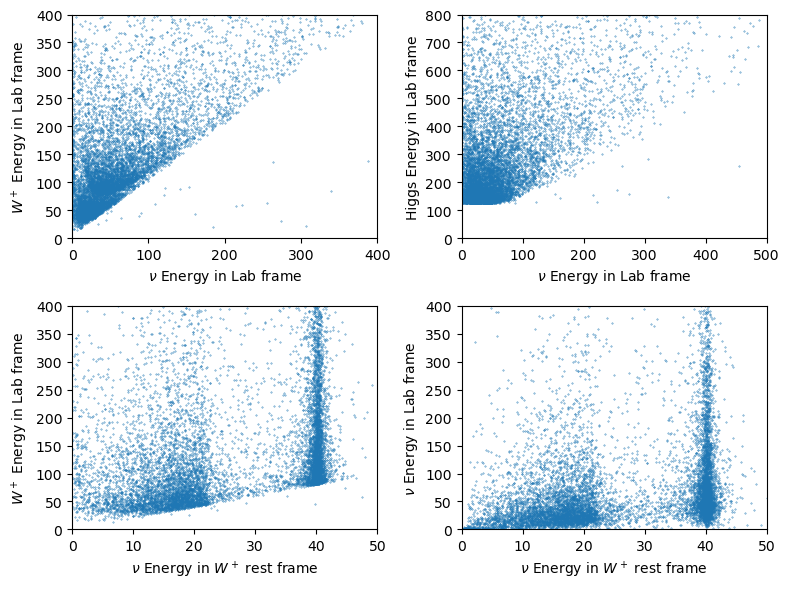

In [108]:
N = 10000
random_LP = np.random.choice(len(NeutrinoP['E_W']),N)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax[0,0].scatter(NeutrinoP['E'][random_LP],WBosonP['E'][random_LP],s=0.1)
ax[0,0].set_xlim([0,400])
ax[0,0].set_ylim([0,400])
ax[0,0].set_xlabel(r'$\nu$ Energy in Lab frame')
ax[0,0].set_ylabel(r'$W^+$ Energy in Lab frame')

ax[0,1].scatter(NeutrinoP['E'][random_LP],Higgs['E'][random_LP],s=0.1)
ax[0,1].set_xlabel(r'$\nu$ Energy in Lab frame')
ax[0,1].set_ylabel(r'Higgs Energy in Lab frame')
ax[0,1].set_xlim([0,500])
ax[0,1].set_ylim([0,800])

ax[1,0].scatter(NeutrinoP['E_W'][random_LP],WBosonP['E'][random_LP],s=0.1)
ax[1,0].set_xlim([0,50])
ax[1,0].set_ylim([0,400])
ax[1,0].set_xlabel(r'$\nu$ Energy in $W^+$ rest frame')
ax[1,0].set_ylabel(r'$W^+$ Energy in Lab frame')
ax[1,1].scatter(NeutrinoP['E_W'][random_LP],NeutrinoP['E'][random_LP],s=0.1)
ax[1,1].set_xlim([0,50])
ax[1,1].set_xlabel(r'$\nu$ Energy in $W^+$ rest frame')
ax[1,1].set_ylabel(r'$\nu$ Energy in Lab frame')
ax[1,1].set_ylim([0,400])
plt.tight_layout()

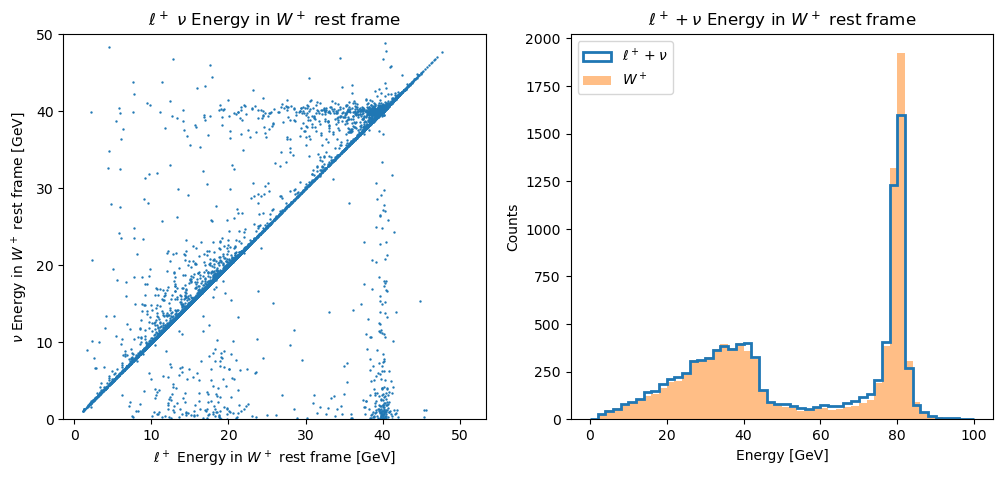

In [361]:
N = 10000
random_LP = np.random.choice(len(NeutrinoP['E_W']),N)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax[0].set_title(r"$\ell^+$ $\nu$ Energy in $W^+$ rest frame")
ax[0].scatter(LeptonP['E_W'][random_LP],NeutrinoP['E_W'][random_LP],s=0.5)
ax[0].set_ylim([0,50])
ax[0].set_xlabel(r"$\ell^+$ Energy in $W^+$ rest frame [GeV]")
ax[0].set_ylabel(r"$\nu$ Energy in $W^+$ rest frame [GeV]")
ax[1].set_title(r"$\ell^+ + \nu$ Energy in $W^+$ rest frame")
ax[1].hist(LeptonP['E_W'][random_LP]+NeutrinoP['E_W'][random_LP],range=[0,100],bins=50,histtype='step',lw=2,label=r'$\ell^+ + \nu$')
ax[1].hist(WBosonP['E_W'][random_LP],range=[0,100],bins=50,histtype='bar',alpha=0.5,label=r'$W^+$')
ax[1].set_xlabel("Energy [GeV]")
ax[1].set_ylabel("Counts")
ax[1].legend()
plt.show()

In [8]:
from sklearn.svm import   SVR
from sklearn.svm import NuSVR
from sklearn.model_selection import train_test_split

In [9]:
LeptonP.describe()

,E,px,py,pz,m
count,2.928862e+06,2.928862e+06,2.928862e+06,2.928862e+06,2.928862e+06
mean,9.158018e+01,-3.521672e-02,-1.242324e-02,1.350384e-01,5.312431e-02
std,1.270956e+02,2.456816e+01,2.453534e+01,1.527568e+02,5.257450e-02
min,7.488680e-04,-8.960873e+02,-5.162718e+02,-2.957204e+03,5.110000e-04
25%,2.842991e+01,-1.477288e+01,-1.474888e+01,-3.590682e+01,5.110000e-04
50%,5.005222e+01,-3.815397e-02,-2.034309e-02,3.657880e-02,1.056600e-01
75%,1.000011e+02,1.470764e+01,1.473065e+01,3.621428e+01,1.056600e-01
max,3.199309e+03,5.393957e+02,5.822423e+02,3.199011e+03,1.056600e-01


In [388]:
N = 10000 # sample size for training
sample = np.random.choice(np.arange(0,len(LeptonP['E'])), N)
X_train = LeptonP.iloc[sample,0:4].to_numpy() # columns 1,2,3 correspond to three-momentum component
y_train = NeutrinoP.iloc[sample,0].to_numpy() # 0th column is the four-momentum energy component
print(X_train.shape,y_train.shape)

(10000, 4) (10000,)


In [389]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_test , X_val , y_test , y_val  = train_test_split(X_test , y_test , test_size=0.2, random_state=42)
print('Training   data shape: ',X_train.shape, 'Training   label shape: ', y_train.shape)
print('Testing    data shape: ',X_test.shape , 'Testing    label shape: ', y_test.shape)
print('Validation data shape: ',X_val.shape  ,' Validation label shape: ', y_val.shape)

Training   data shape:  (8000, 4) Training   label shape:  (8000,)
Testing    data shape:  (1600, 4) Testing    label shape:  (1600,)
Validation data shape:  (400, 4)  Validation label shape:  (400,)


## Symbolic regression method
Construction of a Kinematic Variable Sensitive to the Mass of the Standard Model Higgs Boson in
$H \to WW^* \to \ell^+ \nu \ell^- \bar{\nu}$ using Symbolic Regression [arXiv:1006.4998](https://arxiv.org/pdf/1006.4998.pdf) 

\begin{equation*}
S^2_\text{mass} = 2 {p_{1T}}^2 + 2 {p_{1T}}^2 + 3(p_{1T}p_{2T} + \vec{E}_T\cdot(\vec{p}_{1T}+\vec{p}_{2T}) - 2\vec{p}_{1T}\cdot\vec{p}_{2T})
\end{equation*}